In [2]:
data = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data"
res = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/results"

In [3]:
import pandas as pd
import os

## Medication Patient Data

In [4]:
m_p_df = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med_patient_data.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_23190/3908620283.py:1: DtypeWarning: Columns (13,19,24) have mixed types. Specify dtype option on import or set low_memory=False.
  m_p_df = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med_patient_data.csv"))


In [5]:
m_p_df = m_p_df.drop(columns=["Unnamed: 0"]).rename(columns={"SUBJECT_ID_x":"SUBJECT_ID"})

In [6]:
med1 = m_p_df.copy()

In [7]:
v = med1.groupby(["SUBJECT_ID", "HADM_ID"]).count()[["ITEMID"]].reset_index()
t = v.groupby("SUBJECT_ID").count()

In [8]:
print(t[t["ITEMID"]>1].shape) # Unique subjects with more than 1 admission = 2586
print(t.shape) # Unique subjects = 17675

(2670, 2)
(17680, 2)


In [9]:
med1["STARTTIME"] = pd.to_datetime(med1["STARTTIME"])
med1["ENDTIME"] = pd.to_datetime(med1["ENDTIME"])
med1["ADMITTIME"] = pd.to_datetime(med1["ADMITTIME"])
med1["MedTimeFromAdmit"] = med1["ENDTIME"]-med1["ADMITTIME"]
med1["hours_in"] = med1["MedTimeFromAdmit"].dt.total_seconds()/3600

In [11]:
h_adm_1 = med1.sort_values(["SUBJECT_ID", "STARTTIME"]).groupby("SUBJECT_ID").nth(0)["HADM_ID"].to_list()

In [22]:
len(h_adm_1)

17680

In [16]:
# med1 = med1.drop(columns=["Unnamed: 0.2", "Unnamed: 0.1"])

In [17]:
adm_1 = med1[med1.HADM_ID.isin(h_adm_1)]

In [18]:
adm_1

,ROW_ID_x,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,RATE,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,hours_in
0,241,27063,139787,223259.0,2133-02-05 06:29:00,2133-02-05 08:45:00,225166,6.774532,mEq,NaN,...,Potassium Chloride,Potassium Chloride - KCL,metavision,inputevents_mv,Medications,mEq,Solution,NaN,16 days 13:31:00,397.516667
1,243,27063,139787,223259.0,2133-02-05 05:34:00,2133-02-05 06:30:00,225166,2.813300,mEq,NaN,...,Potassium Chloride,Potassium Chloride - KCL,metavision,inputevents_mv,Medications,mEq,Solution,NaN,16 days 11:16:00,395.266667
2,247,27063,139787,223259.0,2133-02-05 05:34:00,2133-02-05 07:03:00,225166,4.433333,mEq,NaN,...,Potassium Chloride,Potassium Chloride - KCL,metavision,inputevents_mv,Medications,mEq,Solution,NaN,16 days 11:49:00,395.816667
3,249,27063,139787,223259.0,2133-02-05 09:43:00,2133-02-05 12:30:00,225166,8.360021,mEq,NaN,...,Potassium Chloride,Potassium Chloride - KCL,metavision,inputevents_mv,Medications,mEq,Solution,NaN,16 days 17:16:00,401.266667
4,251,27063,139787,223259.0,2133-02-05 05:34:00,2133-02-05 05:35:00,225166,0.050060,mEq,NaN,...,Potassium Chloride,Potassium Chloride - KCL,metavision,inputevents_mv,Medications,mEq,Solution,NaN,16 days 10:21:00,394.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618986,3591311,46156,127108,258962.0,2134-08-21 02:00:00,2134-08-21 06:58:00,228361,49.666668,ml,10.000000,...,Pulmocare (1/4),Pulmocare (1/4),metavision,inputevents_mv,Nutrition - Enteral,mL,Solution,NaN,4 days 14:21:00,110.350000
3618987,3588947,60353,111636,248214.0,2137-09-08 10:30:00,2137-09-08 17:00:00,228141,65.000001,ml,10.000000,...,Dextrose 30%,Dextrose 30%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 17:32:00,17.533333
3618988,3589021,60353,111636,248214.0,2137-09-08 20:00:00,2137-09-09 02:36:00,228141,59.414343,ml,9.002173,...,Dextrose 30%,Dextrose 30%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,1 days 03:08:00,27.133333
3618989,3588965,60353,111636,248214.0,2137-09-08 19:00:00,2137-09-08 20:00:00,228141,8.001279,ml,8.001279,...,Dextrose 30%,Dextrose 30%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 20:32:00,20.533333


In [137]:
adm_1.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med1_vectorized_new.csv"))

In [26]:
v = adm_1.groupby(["SUBJECT_ID", "HADM_ID"]).count()[["ITEMID"]].reset_index()
t = v.groupby("SUBJECT_ID").count()
print(t[t["ITEMID"]>1].shape) # Unique subjects with more than 1 admission = 2586
print(t.shape) # Unique subjects = 17675

(0, 2)
(17680, 2)


In [28]:
med1 = adm_1.copy()

In [34]:
med_adm = med1.sort_values(["SUBJECT_ID", "STARTTIME", "ITEMID"]).groupby(["SUBJECT_ID", "STARTTIME"]).nth(0)

In [40]:
med_adm_1st = med_adm.reset_index().groupby("SUBJECT_ID").nth(0).reset_index()

In [42]:
med_adm_2nd = med_adm.reset_index().groupby("SUBJECT_ID").nth(1).reset_index()

In [47]:
med_adm_1st_2nd = pd.merge(med_adm_1st, med_adm_2nd, on=["SUBJECT_ID", "HADM_ID"], how="inner")

In [51]:
med_adm_1st_2nd["TIME_DIFF"] = med_adm_1st_2nd["STARTTIME_y"] - med_adm_1st_2nd["STARTTIME_x"]

In [56]:
med_adm_1st_2nd["TIME_DIFF_MIN"] = med_adm_1st_2nd["TIME_DIFF"].dt.total_seconds()//60

In [ ]:
import matplotlib.pyplot as plt

plot_data = med_adm_1st_2nd.groupby("TIME_DIFF_MIN").count()[["SUBJECT_ID"]].reset_index()
plot_data = plot_data[plot_data["TIME_DIFF_MIN"]<(60*24)]
plot_data_dict = [list(plot_data.to_dict()[k].values()) for k in plot_data.to_dict()]

plt.bar(plot_data_dict[0], plot_data_dict[1])
plt.xlabel('Time (min)')
plt.ylabel('Count of Patients')
plt.title('Histogram of differnce in time between 1st and 2nd medication administration')

Text(0.5, 1.0, 'Histogram of differnce in time between 1st and 2nd medication administration')

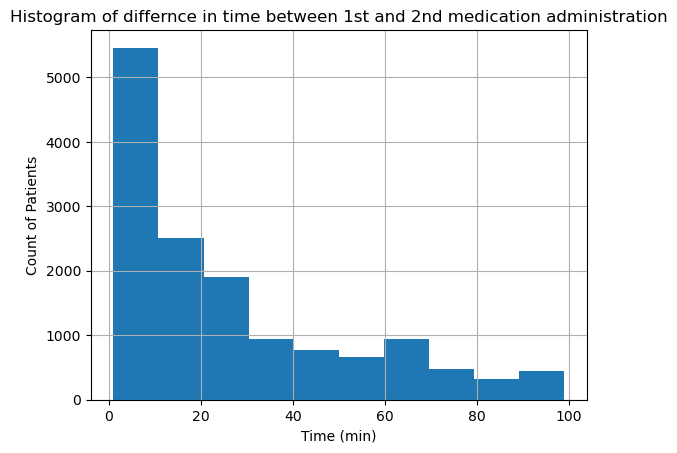

In [110]:
med_adm_1st_2nd[med_adm_1st_2nd["TIME_DIFF_MIN"]<100].hist(column="TIME_DIFF_MIN")
plt.xlabel('Time (min)')
plt.ylabel('Count of Patients')
plt.title('Histogram of differnce in time between 1st and 2nd medication administration')

In [ ]:
med_1type_only = adm_1.groupby(["SUBJECT_ID", "STARTTIME"]).count().reset_index().groupby("SUBJECT_ID").nth(0)[["HADM_ID"]]

In [114]:
med_1type_only = med_1type_only[med_1type_only["HADM_ID"]<=1].reset_index()

In [117]:
adm_1_1type_only = adm_1[adm_1["SUBJECT_ID"].isin(med_1type_only["SUBJECT_ID"])]

In [118]:
adm_1_1type_only

,ROW_ID_x,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,RATE,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,hours_in
20,505,18082,181163,267692.0,2156-03-06 07:30:00,2156-03-06 08:30:00,225166,20.000000,mEq,NaN,...,Potassium Chloride,Potassium Chloride - KCL,metavision,inputevents_mv,Medications,mEq,Solution,NaN,12 days 07:22:00,295.366667
21,509,18082,181163,267692.0,2156-02-25 05:40:00,2156-02-25 06:40:00,225166,20.000000,mEq,NaN,...,Potassium Chloride,Potassium Chloride - KCL,metavision,inputevents_mv,Medications,mEq,Solution,NaN,2 days 05:32:00,53.533333
22,628,18082,181163,267692.0,2156-02-29 07:00:00,2156-02-29 08:00:00,225166,20.000000,mEq,NaN,...,Potassium Chloride,Potassium Chloride - KCL,metavision,inputevents_mv,Medications,mEq,Solution,NaN,6 days 06:52:00,150.866667
23,654,18082,181163,267692.0,2156-02-28 01:57:00,2156-02-28 02:57:00,225166,20.000000,mEq,NaN,...,Potassium Chloride,Potassium Chloride - KCL,metavision,inputevents_mv,Medications,mEq,Solution,NaN,5 days 01:49:00,121.816667
24,558,18082,181163,267692.0,2156-03-02 06:28:00,2156-03-02 07:28:00,225166,20.000000,mEq,NaN,...,Potassium Chloride,Potassium Chloride - KCL,metavision,inputevents_mv,Medications,mEq,Solution,NaN,8 days 06:20:00,198.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618962,3577690,2092,105566,219295.0,2187-09-26 23:00:00,2187-09-27 09:30:00,228383,735.122556,ml,70.011672,...,Peptamen Bariatric (Full),Peptamen Bariatric (Full),metavision,inputevents_mv,Nutrition - Enteral,mL,Solution,NaN,7 days 13:27:00,181.450000
3618963,3578060,2092,105566,219295.0,2187-09-25 06:08:00,2187-09-25 11:40:00,228383,387.325011,ml,69.998496,...,Peptamen Bariatric (Full),Peptamen Bariatric (Full),metavision,inputevents_mv,Nutrition - Enteral,mL,Solution,NaN,5 days 15:37:00,135.616667
3618964,3578070,2092,105566,219295.0,2187-09-29 19:02:00,2187-09-30 00:16:00,228383,367.895996,ml,70.298598,...,Peptamen Bariatric (Full),Peptamen Bariatric (Full),metavision,inputevents_mv,Nutrition - Enteral,mL,Solution,NaN,10 days 04:13:00,244.216667
3618965,3581769,84822,153359,254911.0,2191-10-01 15:52:00,2191-10-01 15:53:00,228383,0.166667,ml,10.000000,...,Peptamen Bariatric (Full),Peptamen Bariatric (Full),metavision,inputevents_mv,Nutrition - Enteral,mL,Solution,NaN,1 days 17:36:00,41.600000


In [119]:
med1 = adm_1_1type_only.copy()

In [120]:
med_adm = med1.sort_values(["SUBJECT_ID", "STARTTIME", "ITEMID"]).groupby(["SUBJECT_ID", "STARTTIME"]).nth(0)

In [121]:
med_adm_1st = med_adm.reset_index().groupby("SUBJECT_ID").nth(0).reset_index()

In [122]:
med_adm_2nd = med_adm.reset_index().groupby("SUBJECT_ID").nth(1).reset_index()

In [123]:
med_adm_1st_2nd = pd.merge(med_adm_1st, med_adm_2nd, on=["SUBJECT_ID", "HADM_ID"], how="inner")

In [124]:
med_adm_1st_2nd["TIME_DIFF"] = med_adm_1st_2nd["STARTTIME_y"] - med_adm_1st_2nd["STARTTIME_x"]

In [125]:
med_adm_1st_2nd["TIME_DIFF_MIN"] = med_adm_1st_2nd["TIME_DIFF"].dt.total_seconds()//60

In [133]:
# 100 Min Difference data only
med_adm_1st_2nd[med_adm_1st_2nd["TIME_DIFF_MIN"]<100].hist(column="TIME_DIFF_MIN", by="LABEL_x", figsize=(100,100))
plt.xlabel('Time (min)')
plt.ylabel('Count of Patients')
plt.title('Histogram of differnce in time between 1st and 2nd medication administration')

Text(0.5, 1.0, 'Histogram of differnce in time between 1st and 2nd medication administration')

Text(0.5, 1.0, 'Histogram of differnce in time between 1st and 2nd medication administration')

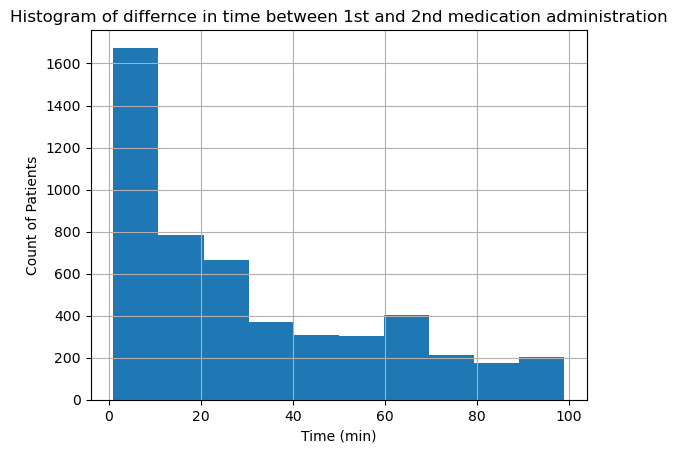

In [134]:
# 100 min
med_adm_1st_2nd[med_adm_1st_2nd["TIME_DIFF_MIN"]<100].hist(column="TIME_DIFF_MIN")
plt.xlabel('Time (min)')
plt.ylabel('Count of Patients')
plt.title('Histogram of differnce in time between 1st and 2nd medication administration')

Text(0.5, 1.0, 'Histogram of differnce in time between 1st and 2nd medication administration')

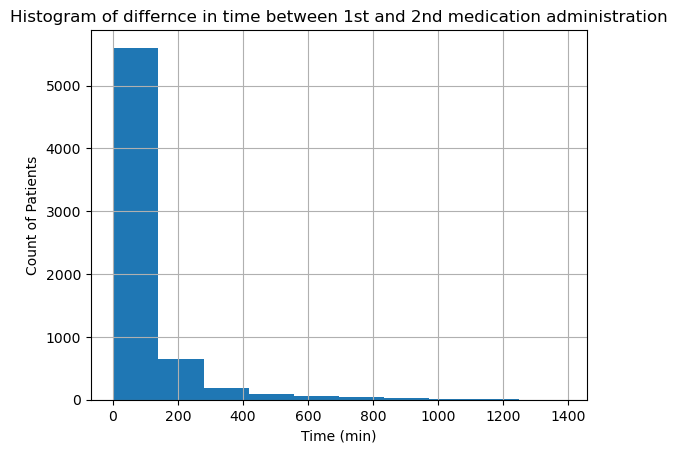

In [135]:
# 60*24 min
med_adm_1st_2nd[med_adm_1st_2nd["TIME_DIFF_MIN"]<60*24].hist(column="TIME_DIFF_MIN")
plt.xlabel('Time (min)')
plt.ylabel('Count of Patients')
plt.title('Histogram of differnce in time between 1st and 2nd medication administration')

Text(0.5, 1.0, 'Histogram of differnce in time between 1st and 2nd medication administration')

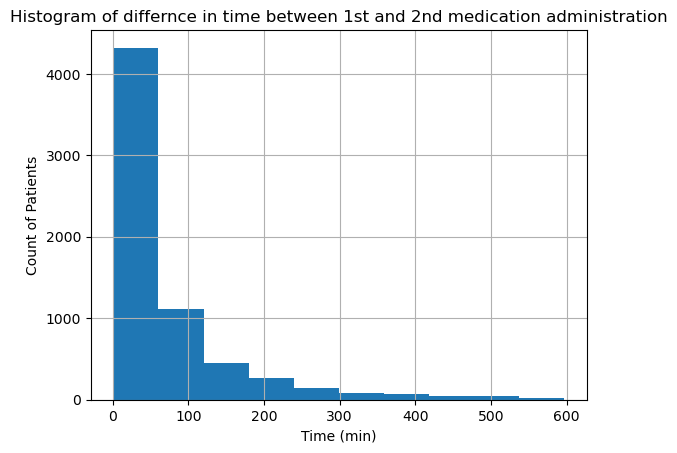

In [136]:
# 60*10 min
med_adm_1st_2nd[med_adm_1st_2nd["TIME_DIFF_MIN"]<60*10].hist(column="TIME_DIFF_MIN")
plt.xlabel('Time (min)')
plt.ylabel('Count of Patients')
plt.title('Histogram of differnce in time between 1st and 2nd medication administration')

## Filter Meds

### Med 1

In [3]:
med1 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med1_vectorized.csv"))

In [4]:
med1 = med1.drop(columns=["Unnamed: 0"])

In [5]:
med1

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE
0,249,2075-03-13,F,NaN,0,226361,149546,269035.0,2155-02-03 23:00:00,2155-02-03 23:01:00,...,Pre-Admission Intake,Pre-Admission Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 02:45:00,80.0
1,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,Pantoprazole (Protonix),Pantoprazole (Protonix),metavision,inputevents_mv,Medications,dose,Solution,NaN,0 days 04:34:00,80.0
2,249,2075-03-13,F,NaN,0,225943,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,Solution,Solution,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 04:34:00,80.0
3,249,2075-03-13,F,NaN,0,223258,149546,269035.0,2155-02-04 00:50:00,2155-02-04 00:51:00,...,Insulin - Regular,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 04:35:00,80.0
4,249,2075-03-13,F,NaN,0,225168,149546,269035.0,2155-02-04 03:24:00,2155-02-04 05:24:00,...,Packed Red Blood Cells,PRBC's,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,0 days 09:08:00,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323002,44128,2098-07-25,M,NaN,0,225166,141304,253669.0,2149-06-11 02:25:00,2149-06-11 19:59:00,...,Potassium Chloride,Potassium Chloride - KCL,metavision,inputevents_mv,Medications,mEq,Solution,NaN,3 days 04:38:00,51.0
323003,44128,2098-07-25,M,NaN,0,225158,141304,253669.0,2149-06-11 20:07:00,2149-06-12 02:04:00,...,NaCl 0.9%,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 10:43:00,51.0
323004,44128,2098-07-25,M,NaN,0,225834,141304,253669.0,2149-06-11 20:07:00,2149-06-12 02:04:00,...,K Phos,K Phos,metavision,inputevents_mv,Medications,mmol,Solution,NaN,3 days 10:43:00,51.0
323005,44128,2098-07-25,M,NaN,0,223258,141304,253669.0,2149-06-12 14:40:00,2149-06-12 14:41:00,...,Insulin - Regular,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,3 days 23:20:00,51.0


In [19]:
v = med1.groupby(["SUBJECT_ID", "HADM_ID"]).count()[["ITEMID"]].reset_index()
t = v.groupby("SUBJECT_ID").count()
# t[t["ITEMID"]>1] # Unique subjects with more than 1 admission = 2586
# t.shape # Unique subjects = 17675

In [28]:
med1["STARTTIME"] = pd.to_datetime(med1["STARTTIME"])
med1["ENDTIME"] = pd.to_datetime(med1["ENDTIME"])
med1["ADMITTIME"] = pd.to_datetime(med1["ADMITTIME"])
med1["MedTimeFromAdmit"] = med1["ENDTIME"]-med1["ADMITTIME"]
med1["hours_in"] = med1["MedTimeFromAdmit"].dt.total_seconds()/3600

In [29]:
adm_1 = med1[med1.SUBJECT_ID.isin(t[t["ITEMID"]>1].index.to_list())]

In [30]:
adm_1

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE,hours_in
0,249,2075-03-13,F,NaN,0,226361,149546,269035.0,2155-02-03 23:00:00,2155-02-03 23:01:00,...,Pre-Admission Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 02:45:00,80.0,2.750000
1,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,Pantoprazole (Protonix),metavision,inputevents_mv,Medications,dose,Solution,NaN,0 days 04:34:00,80.0,4.566667
2,249,2075-03-13,F,NaN,0,225943,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,Solution,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 04:34:00,80.0,4.566667
3,249,2075-03-13,F,NaN,0,223258,149546,269035.0,2155-02-04 00:50:00,2155-02-04 00:51:00,...,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 04:35:00,80.0,4.583333
4,249,2075-03-13,F,NaN,0,225168,149546,269035.0,2155-02-04 03:24:00,2155-02-04 05:24:00,...,PRBC's,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,0 days 09:08:00,80.0,9.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322890,44083,2057-11-15,M,2114-02-20 00:00:00,1,225975,125157,265615.0,2112-05-06 00:15:00,2112-05-06 00:16:00,...,Heparin Sodium (Prophylaxis),metavision,inputevents_mv,Medications,dose,Solution,NaN,1 days 16:16:00,55.0,40.266667
322891,44083,2057-11-15,M,2114-02-20 00:00:00,1,225823,125157,265615.0,2112-05-06 08:49:00,2112-05-06 17:20:00,...,D5 1/2NS,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,2 days 09:20:00,55.0,57.333333
322892,44083,2057-11-15,M,2114-02-20 00:00:00,1,225166,125157,265615.0,2112-05-06 08:49:00,2112-05-06 17:20:00,...,Potassium Chloride - KCL,metavision,inputevents_mv,Medications,mEq,Solution,NaN,2 days 09:20:00,55.0,57.333333
322893,44083,2057-11-15,M,2114-02-20 00:00:00,1,225850,198330,286428.0,2112-05-31 02:00:00,2112-05-31 02:01:00,...,Cefazolin,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,2 days 10:16:00,55.0,58.266667


In [31]:
med1.sort_values(["SUBJECT_ID", "STARTTIME", "ITEMID"]).groupby(["SUBJECT_ID", "STARTTIME"]).nth(0)

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE,hours_in
263,23,2082-07-17,M,NaN,0,222051,124321,234044.0,2157-10-21 12:15:00,2157-10-21 13:22:00,...,Nitroprusside,metavision,inputevents_mv,Medications,mg,Solution,NaN,2 days 17:48:00,75.0,65.800000
262,23,2082-07-17,M,NaN,0,225158,124321,234044.0,2157-10-21 12:15:00,2157-10-21 13:22:00,...,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,2 days 17:48:00,75.0,65.800000
261,23,2082-07-17,M,NaN,0,226364,124321,234044.0,2157-10-21 12:15:00,2157-10-21 12:16:00,...,OR Crystalloid Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,2 days 16:42:00,75.0,64.700000
264,23,2082-07-17,M,NaN,0,220949,124321,234044.0,2157-10-21 15:00:00,2157-10-21 15:01:00,...,Dextrose 5%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,2 days 19:27:00,75.0,67.450000
266,23,2082-07-17,M,NaN,0,225798,124321,234044.0,2157-10-21 15:00:00,2157-10-21 15:01:00,...,Vancomycin,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,2 days 19:27:00,75.0,67.450000
265,23,2082-07-17,M,NaN,0,225879,124321,234044.0,2157-10-21 15:00:00,2157-10-21 15:01:00,...,Levofloxacin,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,2 days 19:27:00,75.0,67.450000
267,23,2082-07-17,M,NaN,0,223262,124321,234044.0,2157-10-21 16:38:00,2157-10-21 16:39:00,...,Insulin - Humalog,metavision,inputevents_mv,Medications,units,Solution,NaN,2 days 21:05:00,75.0,69.083333
268,23,2082-07-17,M,NaN,0,222042,124321,234044.0,2157-10-21 16:55:00,2157-10-21 17:56:00,...,Nicardipine,metavision,inputevents_mv,Medications,mg,Solution,NaN,2 days 22:22:00,75.0,70.366667
270,23,2082-07-17,M,NaN,0,222011,124321,234044.0,2157-10-21 17:08:00,2157-10-21 18:08:00,...,Magnesium Sulfate,metavision,inputevents_mv,Medications,grams,Solution,NaN,2 days 22:34:00,75.0,70.566667
269,23,2082-07-17,M,NaN,0,227523,124321,234044.0,2157-10-21 17:08:00,2157-10-21 18:08:00,...,Magnesium Sulfate (Bolus),metavision,inputevents_mv,Medications,mL,Solution,NaN,2 days 22:34:00,75.0,70.566667


In [6]:
'AGE' in med1.columns

True

In [ ]:
med1

### Med 2

In [8]:
med2 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med2_vectorized.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_87162/27638116.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  med2 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med2_vectorized.csv"))


In [9]:
med2 = med2.drop(columns=["Unnamed: 0"])

## Filter Labs

In [10]:
labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "labs_vectorized.csv"))
# labs = labs.rename(columns={"SUBJECT_ID_x":"SUBJECT_ID"})

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_87162/2399771944.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "labs_vectorized.csv"))


In [11]:
labs = labs.drop(columns=["Unnamed: 0"])
labs

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ROW_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LabTimeFromAdmit,AGE
0,249,2075-03-13,F,NaN,0,163327,158975.0,51274,2156-04-27 15:40:00,20.0,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
1,249,2075-03-13,F,NaN,0,163304,158975.0,50868,2156-04-27 15:40:00,12.0,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
2,249,2075-03-13,F,NaN,0,163317,158975.0,51221,2156-04-27 15:40:00,29.5,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
3,249,2075-03-13,F,NaN,0,163315,158975.0,51146,2156-04-27 15:40:00,0.4,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
4,249,2075-03-13,F,NaN,0,163316,158975.0,51200,2156-04-27 15:40:00,2.4,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260280,44128,2098-07-25,M,NaN,0,20437251,141304.0,51275,2149-06-14 05:00:00,26.4,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260281,44128,2098-07-25,M,NaN,0,20437245,141304.0,51237,2149-06-14 05:00:00,1.1,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260282,44128,2098-07-25,M,NaN,0,20437250,141304.0,51274,2149-06-14 05:00:00,12.8,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260283,44128,2098-07-25,M,NaN,0,20437255,141304.0,51221,2149-06-15 04:45:00,27.3,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,6 days 13:24:00,51.0


## Pairs

In [12]:
counts = med1.groupby("ITEMID").count()[["HADM_ID"]].sort_values("HADM_ID", ascending=False)
counts[counts["HADM_ID"]>1000]

,HADM_ID
ITEMID,
225158,15866
220949,13849
226452,13351
225943,11183
222011,9274
...,...
225883,1149
225833,1045
228315,1044


In [13]:
labitems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_LABITEMS.csv.gz"))
meditems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_ITEMS.csv.gz"))

In [14]:
labs

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ROW_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LabTimeFromAdmit,AGE
0,249,2075-03-13,F,NaN,0,163327,158975.0,51274,2156-04-27 15:40:00,20.0,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
1,249,2075-03-13,F,NaN,0,163304,158975.0,50868,2156-04-27 15:40:00,12.0,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
2,249,2075-03-13,F,NaN,0,163317,158975.0,51221,2156-04-27 15:40:00,29.5,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
3,249,2075-03-13,F,NaN,0,163315,158975.0,51146,2156-04-27 15:40:00,0.4,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
4,249,2075-03-13,F,NaN,0,163316,158975.0,51200,2156-04-27 15:40:00,2.4,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260280,44128,2098-07-25,M,NaN,0,20437251,141304.0,51275,2149-06-14 05:00:00,26.4,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260281,44128,2098-07-25,M,NaN,0,20437245,141304.0,51237,2149-06-14 05:00:00,1.1,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260282,44128,2098-07-25,M,NaN,0,20437250,141304.0,51274,2149-06-14 05:00:00,12.8,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260283,44128,2098-07-25,M,NaN,0,20437255,141304.0,51221,2149-06-15 04:45:00,27.3,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,6 days 13:24:00,51.0


In [15]:
pd.DataFrame(med1.groupby(["LABEL", "SUBJECT_ID"]).nth(0).reset_index()["LABEL"].value_counts()).reset_index().rename(columns={"index":"MED_NAME", "LABEL":"DATA_POINTS"}).head(10)

,MED_NAME,DATA_POINTS
0,NaCl 0.9%,15866
1,Dextrose 5%,13849
2,PO Intake,13351
3,Solution,11183
4,Magnesium Sulfate,9274
5,Potassium Chloride,9221
6,Heparin Sodium (Prophylaxis),8759
7,Insulin - Regular,7948
8,Vancomycin,7377
9,Magnesium Sulfate (Bolus),7279


In [16]:
pd.DataFrame(med1.groupby(["LABEL", "SUBJECT_ID"]).nth(0).reset_index()["LABEL"].value_counts()).reset_index().rename(columns={"index":"MED_NAME", "LABEL":"DATA_POINTS"}).head(10)

,MED_NAME,DATA_POINTS
0,NaCl 0.9%,15866
1,Dextrose 5%,13849
2,PO Intake,13351
3,Solution,11183
4,Magnesium Sulfate,9274
5,Potassium Chloride,9221
6,Heparin Sodium (Prophylaxis),8759
7,Insulin - Regular,7948
8,Vancomycin,7377
9,Magnesium Sulfate (Bolus),7279


In [17]:
med1["STARTTIME"] = pd.to_datetime(med1["STARTTIME"])
med1["ENDTIME"] = pd.to_datetime(med1["ENDTIME"])
med1["ADMITTIME"] = pd.to_datetime(med1["ADMITTIME"])
med1["MedTimeFromAdmit"] = med1["ENDTIME"]-med1["ADMITTIME"]
med2["STARTTIME"] = pd.to_datetime(med2["STARTTIME"])
med2["ENDTIME"] = pd.to_datetime(med2["ENDTIME"])
med2["ADMITTIME"] = pd.to_datetime(med2["ADMITTIME"])
med2["MedTimeFromAdmit"] = med2["ENDTIME"]-med2["ADMITTIME"]
labs["CHARTTIME"] = pd.to_datetime(labs["CHARTTIME"])
labs["ADMITTIME"] = pd.to_datetime(labs["ADMITTIME"])
labs["LabTimeFromAdmit"] = labs["CHARTTIME"]-labs["ADMITTIME"]

In [18]:
med1["hours_in"] = med1["MedTimeFromAdmit"].dt.total_seconds()/3600
labs["hours_in"] = labs["LabTimeFromAdmit"].dt.total_seconds()/3600

In [19]:
labs

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ROW_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,...,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LabTimeFromAdmit,AGE,hours_in
0,249,2075-03-13,F,NaN,0,163327,158975.0,51274,2156-04-27 15:40:00,20.0,...,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0,0.116667
1,249,2075-03-13,F,NaN,0,163304,158975.0,50868,2156-04-27 15:40:00,12.0,...,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0,0.116667
2,249,2075-03-13,F,NaN,0,163317,158975.0,51221,2156-04-27 15:40:00,29.5,...,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0,0.116667
3,249,2075-03-13,F,NaN,0,163315,158975.0,51146,2156-04-27 15:40:00,0.4,...,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0,0.116667
4,249,2075-03-13,F,NaN,0,163316,158975.0,51200,2156-04-27 15:40:00,2.4,...,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0,0.116667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260280,44128,2098-07-25,M,NaN,0,20437251,141304.0,51275,2149-06-14 05:00:00,26.4,...,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0,133.650000
7260281,44128,2098-07-25,M,NaN,0,20437245,141304.0,51237,2149-06-14 05:00:00,1.1,...,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0,133.650000
7260282,44128,2098-07-25,M,NaN,0,20437250,141304.0,51274,2149-06-14 05:00:00,12.8,...,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0,133.650000
7260283,44128,2098-07-25,M,NaN,0,20437255,141304.0,51221,2149-06-15 04:45:00,27.3,...,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,6 days 13:24:00,51.0,157.400000


In [20]:
med1

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE,hours_in
0,249,2075-03-13,F,NaN,0,226361,149546,269035.0,2155-02-03 23:00:00,2155-02-03 23:01:00,...,Pre-Admission Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 02:45:00,80.0,2.750000
1,249,2075-03-13,F,NaN,0,225910,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,Pantoprazole (Protonix),metavision,inputevents_mv,Medications,dose,Solution,NaN,0 days 04:34:00,80.0,4.566667
2,249,2075-03-13,F,NaN,0,225943,149546,269035.0,2155-02-04 00:49:00,2155-02-04 00:50:00,...,Solution,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 04:34:00,80.0,4.566667
3,249,2075-03-13,F,NaN,0,223258,149546,269035.0,2155-02-04 00:50:00,2155-02-04 00:51:00,...,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 04:35:00,80.0,4.583333
4,249,2075-03-13,F,NaN,0,225168,149546,269035.0,2155-02-04 03:24:00,2155-02-04 05:24:00,...,PRBC's,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,0 days 09:08:00,80.0,9.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323002,44128,2098-07-25,M,NaN,0,225166,141304,253669.0,2149-06-11 02:25:00,2149-06-11 19:59:00,...,Potassium Chloride - KCL,metavision,inputevents_mv,Medications,mEq,Solution,NaN,3 days 04:38:00,51.0,76.633333
323003,44128,2098-07-25,M,NaN,0,225158,141304,253669.0,2149-06-11 20:07:00,2149-06-12 02:04:00,...,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 10:43:00,51.0,82.716667
323004,44128,2098-07-25,M,NaN,0,225834,141304,253669.0,2149-06-11 20:07:00,2149-06-12 02:04:00,...,K Phos,metavision,inputevents_mv,Medications,mmol,Solution,NaN,3 days 10:43:00,51.0,82.716667
323005,44128,2098-07-25,M,NaN,0,223258,141304,253669.0,2149-06-12 14:40:00,2149-06-12 14:41:00,...,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,3 days 23:20:00,51.0,95.333333


In [21]:
med1.columns

Index(['SUBJECT_ID', 'DOB', 'GENDER', 'DOD', 'EXPIRE_FLAG', 'ITEMID',
       'HADM_ID', 'ICUSTAY_ID', 'STARTTIME', 'ENDTIME', 'AMOUNT', 'AMOUNTUOM',
       'RATE', 'RATEUOM', 'STORETIME', 'CGID', 'ORDERID', 'LINKORDERID',
       'ORDERCATEGORYNAME', 'SECONDARYORDERCATEGORYNAME',
       'ORDERCOMPONENTTYPEDESCRIPTION', 'ORDERCATEGORYDESCRIPTION',
       'PATIENTWEIGHT', 'TOTALAMOUNT', 'TOTALAMOUNTUOM', 'ISOPENBAG',
       'CONTINUEINNEXTDEPT', 'CANCELREASON', 'STATUSDESCRIPTION',
       'COMMENTS_EDITEDBY', 'COMMENTS_CANCELEDBY', 'COMMENTS_DATE',
       'ORIGINALAMOUNT', 'ORIGINALRATE', 'ROW_ID_y', 'SUBJECT_ID_y',
       'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE',
       'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME',
       'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID',
       'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME',
      

In [22]:
meds = []
labtests = []

# meds.append('Insulin - Regular')
# labtests.append('Glucose')

# meds.append('Packed Red Blood Cells')
# labtests.append('Hematocrait')

# meds.append('Packed Red Blood Cells')
# labtests.append('Hemoglobin')

# meds.append('Packed Red Blood Cells')
# labtests.append('Red Blood Cells')

# meds.append('Calcium')
# labtests.append('Calcium Total')

# meds.append('Albumin 5%')
# labtests.append('Hematocrit')

meds.append('Insulin - Regular')
labtests.append('pO2')

med_vals = list(meds)
labtest_vals = list(labtests)



In [23]:
t_med1 = med1[med1["LABEL"].isin(med_vals)]
t_med2 = med2[med2["LABEL"].isin(med_vals)]

In [24]:
t_labs = labs[labs["LABEL"].isin(labtest_vals)]

## Before After Trend Calculation

In [25]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
def check_med2(row):
    if row["HADM_ID"] in t_med2["HADM_ID"].to_list():
        if row["ITEMID"] in t_med2[t_med2["HADM_ID"]==row["HADM_ID"]]["ITEMID"].to_list():
            return True
    return False

def get_med2(row):
    temp = t_med2[t_med2["HADM_ID"]==row["HADM_ID"]] 
    return temp[temp["ITEMID"]==row["ITEMID"]].iloc[0]

In [26]:
from sklearn import datasets, linear_model, metrics

def get_normalized_trend(data):
    selected = data[['VALUENUM', 'hours_in']]
    if selected.shape[0]<2:
        return float("NaN")
    reg = linear_model.LinearRegression()
    reg.fit(np.array(data['hours_in']).reshape(-1,1), np.array(data['VALUENUM']).reshape(-1,1))
    return reg.coef_[0][0]

In [27]:
def get_normalized_trend_np(data):
    selected = data[['VALUENUM', 'hours_in']]
    print(selected)
    if selected.shape[0]<2:
        return float("NaN")
    print(np.array(data['hours_in']), np.array(data['VALUENUM']))
    t = np.polyfit(np.array(data['hours_in']), np.array(data['VALUENUM']), 1,full=True)
    coefficients, residuals, _, _, _ = t
    print(t)
    mse = residuals[0]/(len(selected.index))
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())
    return 1

In [28]:
window = (1,100, 5)

In [29]:
def get_vals(r):

    row = r.copy()
    for i in range(window[0], window[1], window[2]):

        if i==1:
            lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<row["MedTimeFromAdmit"].total_seconds()]

            b_window_start = row["MedTimeFromAdmit"].total_seconds()
            b_window_end = row["MedTimeFromAdmit"].total_seconds() - 1*3600
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<b_window_start]
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>b_window_end]
            lab_vals["hours_from_med"] = (row["STARTTIME"]-lab_vals["CHARTTIME"]).dt.total_seconds()/3600
            lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

            t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
            val_counts_m = t[t["SUBJECT_ID"]>=1]
            if val_counts_m.shape[0]==0:
                row[f"before_abs_{i}_{window[2]}"] = {}
                row[f"before_time_{i}_{window[2]}"] = {}
            else:
                l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
                row[f"before_abs_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
                row[f"before_time_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

            lab_vals = labs[labs["HADM_ID"]==row["HADM_ID"]]
            med2_bool = check_med2(row)
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>row["MedTimeFromAdmit"].total_seconds()]
            a_window_start = row["MedTimeFromAdmit"].total_seconds()
            a_window_end = row["MedTimeFromAdmit"].total_seconds() + 3600
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>a_window_start]
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<a_window_end]
            lab_vals["hours_from_med"] = (lab_vals["CHARTTIME"]-row["ENDTIME"]).dt.total_seconds()/3600
            lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

            if med2_bool:
                med2_val = get_med2(row)
                lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<med2_val["MedTimeFromAdmit"].total_seconds()]
            
            t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
            
            val_counts_m = t[t["SUBJECT_ID"]>=1]
            if val_counts_m.shape[0]==0:
                row[f"after_abs_{i}_{window[2]}"] = {}
                row[f"after_time_{i}_{window[2]}"] = {}
            else:
                l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
                row[f"after_abs_{i}_{window[2]}"] = lab_vals.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
                row[f"after_time_{i}_{window[2]}"] = lab_vals.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()
    
        lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<row["MedTimeFromAdmit"].total_seconds()]

        b_window_start = row["MedTimeFromAdmit"].total_seconds() - (i*3600)
        b_window_end = row["MedTimeFromAdmit"].total_seconds() - (i+window[2])*3600
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<b_window_start]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>b_window_end]
        lab_vals["hours_from_med"] = (row["STARTTIME"]-lab_vals["CHARTTIME"]).dt.total_seconds()/3600
        lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        val_counts_m = t[t["SUBJECT_ID"]>=1]
        if val_counts_m.shape[0]==0:
            row[f"before_abs_{i}_{window[2]}"] = {}
            row[f"before_time_{i}_{window[2]}"] = {}
        else:
            l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
            row[f"before_abs_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
            row[f"before_time_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

        lab_vals = labs[labs["HADM_ID"]==row["HADM_ID"]]
        med2_bool = check_med2(row)
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>row["MedTimeFromAdmit"].total_seconds()]
        a_window_start = row["MedTimeFromAdmit"].total_seconds() + (i*3600)
        a_window_end = row["MedTimeFromAdmit"].total_seconds() + (i+window[2])*3600
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>a_window_start]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<a_window_end]
        lab_vals["hours_from_med"] = (lab_vals["CHARTTIME"]-row["ENDTIME"]).dt.total_seconds()/3600
        lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        if med2_bool:
            med2_val = get_med2(row)
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<med2_val["MedTimeFromAdmit"].total_seconds()]
        
        t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        
        val_counts_m = t[t["SUBJECT_ID"]>=1]
        if val_counts_m.shape[0]==0:
            row[f"after_abs_{i}_{window[2]}"] = {}
            row[f"after_time_{i}_{window[2]}"] = {}
        else:
            l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
            row[f"after_abs_{i}_{window[2]}"] = lab_vals.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
            row[f"after_time_{i}_{window[2]}"] = lab_vals.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()
        
    return row

In [30]:
# type = "abs"
all_types = set(["abs", "time"])
# other_cols = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
# other_cols.extend([f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])])
cols_b = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
cols_a = [f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
cols = cols_b.copy()
cols.extend(cols_a)

In [31]:
temp = t_med1.copy()
temp = temp.apply(lambda r : get_vals(r), axis=1)

In [32]:
temp

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,after_abs_86_5,after_time_86_5,before_abs_91_5,before_time_91_5,after_abs_91_5,after_time_91_5,before_abs_96_5,before_time_96_5,after_abs_96_5,after_time_96_5
3,249,2075-03-13,F,NaN,0,223258,149546,269035.0,2155-02-04 00:50:00,2155-02-04 00:51:00,...,{},{},{},{},{},{},{},{},{},{}
44,266,2090-12-17,F,NaN,0,223258,186251,293876.0,2168-07-10 20:00:00,2168-07-10 20:01:00,...,{},{},{},{},{},{},{},{},{},{}
65,665,2052-05-20,M,2120-02-04 00:00:00,1,223258,170157,281431.0,2119-05-15 22:00:00,2119-05-15 22:01:00,...,{},{},{},{},{},{},{},{},{},{}
89,671,2148-03-27,M,NaN,0,223258,126769,246119.0,2195-12-31 06:30:00,2195-12-31 06:31:00,...,{},{},{},{},{},{},{},{},{},{}
165,711,2100-03-06,M,2185-05-26 00:00:00,1,223258,158767,270525.0,2185-03-22 17:14:00,2185-03-22 21:00:00,...,{},{},{},{},{},{},{},{},{},{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322825,44069,2064-04-08,M,NaN,0,223258,138192,214441.0,2131-02-15 22:30:00,2131-02-15 22:31:00,...,{},{},{},{},{},{},{},{},{},{}
322851,44073,2086-03-29,F,NaN,0,223258,183835,204605.0,2174-01-01 01:00:00,2174-01-01 01:29:00,...,{},{},{},{},{},{},{},{},{},{}
322902,44084,2057-07-18,F,NaN,0,223258,174828,281506.0,2115-07-25 14:00:00,2115-07-25 15:00:00,...,{},{},{},{},{},{},{},{},{},{}
322943,44123,2049-11-26,F,2135-01-12 00:00:00,1,223258,116395,264065.0,2135-01-06 15:50:00,2135-01-06 15:51:00,...,{},{},{},{},{},{},{},{},{},{}


In [33]:
name =  "Insulin-Regular<>pO2"
temp.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_first_val_{name}.csv"))

In [34]:
import ast
for c in cols:
    temp[c] = temp[c].apply(lambda x : ast.literal_eval(x))


ValueError: malformed node or string: {}

In [ ]:
# [c for c in cols for i in temp[c].to_list() if len(i)>0]

In [ ]:
col_vals = []
for col in cols:
    col_vals.append(
        temp.assign(dict=temp[col].map(lambda d: d.items())).explode("dict", ignore_index=True).assign(
            LAB_ITEMID=lambda df: df.dict.str.get(0),
            temp=lambda df: df.dict.str.get(1)
        ).drop(columns=["dict"]+cols).astype({'temp':'float64', 'LAB_ITEMID':'float64'}).rename(columns={"temp":f"{col}_sp"}).dropna(subset=["LAB_ITEMID"])
    )

In [ ]:
for i in range(1, len(col_vals)):
    col_vals[i] = pd.merge(col_vals[i-1], col_vals[i], how="outer", on=list(t_med1.columns)+["LAB_ITEMID"])

In [ ]:
final = col_vals[-1][list(t_med1.columns)+["LAB_ITEMID"]+[f"{col}_sp" for col in cols]]

In [ ]:
t_final = pd.merge(final.rename(columns={"LABEL":"MED_NAME"}), labitems.rename(columns={"ITEMID":"LAB_ITEMID"}), on="LAB_ITEMID", how="inner").rename(columns={"LABEL":"LAB_NAME"})
final = t_final

In [ ]:
final.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_trends_first_val_{name}.csv"))

In [ ]:
t_final = final.copy()
plot_data = {}
for b in [f"{c}_sp" for c in cols_b]:
    if b in t_final.columns:
        plot_data[b] = []
        for a in [f"{c}_sp" for c in cols_a]:
            if a in t_final.columns:
                plot_data[b].append(t_final.dropna(subset=[a,b]))
        # a_cols = list(set([f"{c}_sp" for c in cols_a]).intersection(list(t_final.columns)))
        # plot_data[b] = t_final[["ITEMID", "MED_NAME", "LAB_ITEMID", "LAB_NAME", b]+a_cols]

In [ ]:
plot_data_concat = {}
for i in plot_data:
    plot_data_concat[i] = pd.concat(plot_data[i])

In [ ]:
[(k, plot_data_concat[k].shape) for k in plot_data_concat]

[('before_abs_1_5_sp', (72178, 145)),
 ('before_time_1_5_sp', (72178, 145)),
 ('before_abs_6_5_sp', (71846, 145)),
 ('before_time_6_5_sp', (71846, 145)),
 ('before_abs_11_5_sp', (57226, 145)),
 ('before_time_11_5_sp', (57226, 145)),
 ('before_abs_16_5_sp', (47924, 145)),
 ('before_time_16_5_sp', (47924, 145)),
 ('before_abs_21_5_sp', (33908, 145)),
 ('before_time_21_5_sp', (33908, 145)),
 ('before_abs_26_5_sp', (29962, 145)),
 ('before_time_26_5_sp', (29962, 145)),
 ('before_abs_31_5_sp', (30008, 145)),
 ('before_time_31_5_sp', (30008, 145)),
 ('before_abs_36_5_sp', (28302, 145)),
 ('before_time_36_5_sp', (28302, 145)),
 ('before_abs_41_5_sp', (27352, 145)),
 ('before_time_41_5_sp', (27352, 145)),
 ('before_abs_46_5_sp', (18564, 145)),
 ('before_time_46_5_sp', (18564, 145)),
 ('before_abs_51_5_sp', (19002, 145)),
 ('before_time_51_5_sp', (19002, 145)),
 ('before_abs_56_5_sp', (20894, 145)),
 ('before_time_56_5_sp', (20894, 145)),
 ('before_abs_61_5_sp', (20232, 145)),
 ('before_time_61

In [ ]:
# type = "abs"
a_t = ["abs", "time"]
# other_cols = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
# other_cols.extend([f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])])
cols_b_sp = [(f"before_{a_t[0]}_{i}_{window[2]}_sp", f"before_{a_t[1]}_{i}_{window[2]}_sp") for i in range(window[0], window[1], window[2]) ]
cols_a_sp = [(f"after_{a_t[0]}_{i}_{window[2]}_sp", f"after_{a_t[1]}_{i}_{window[2]}_sp") for i in range(window[0], window[1], window[2])]
cols_sp = cols_b_sp.copy()
cols_sp.extend(cols_a_sp)

In [ ]:
t_final = final.copy()
plot_data = {}
for b in cols_b_sp:
    if b[0] in t_final.columns:
        plot_data[b[0]] = {}
        for a in cols_a_sp: 
            if a[0] in t_final.columns:
                # print(a, b)
                plot_data[b[0]][a[0]] = t_final.dropna(subset=[a[0], a[1], b[0], b[1]])
                # print(plot_data[b][a][[a, b]])
                # print(plot_data.keys())
        # a_cols = list(set([f"{c}_sp" for c in cols_a]).intersection(list(t_final.columns)))
        # plot_data[b] = t_final[["ITEMID", "MED_NAME", "LAB_ITEMID", "LAB_NAME", b]+a_cols]

In [ ]:
plot_data.keys()

dict_keys(['before_abs_1_5_sp', 'before_abs_6_5_sp', 'before_abs_11_5_sp', 'before_abs_16_5_sp', 'before_abs_21_5_sp', 'before_abs_26_5_sp', 'before_abs_31_5_sp', 'before_abs_36_5_sp', 'before_abs_41_5_sp', 'before_abs_46_5_sp', 'before_abs_51_5_sp', 'before_abs_56_5_sp', 'before_abs_61_5_sp', 'before_abs_66_5_sp', 'before_abs_71_5_sp', 'before_abs_76_5_sp', 'before_abs_81_5_sp', 'before_abs_86_5_sp', 'before_abs_91_5_sp', 'before_abs_96_5_sp'])

In [ ]:
# import pickle
# pickle.dump(plot_data, open("plot_bw_aw_med_lab_data.pkl", "wb"))

In [ ]:
cols_d = dict(cols_sp)

In [ ]:
from scipy.stats import pearsonr, spearmanr
# corr, _ = spearmanr(values, time_diff)
p_data = {}
for k in plot_data:
    print("Before Window: ", k)
    for i, (k_a, data) in enumerate(plot_data[k].items()):
        print("After Window: ", k_a)

        t_data = data.set_index([data["MED_NAME"], data["LAB_NAME"]])        
        med_lab_pairs = t_data.index
        
        for med_lab_pair in med_lab_pairs.unique():
            
            if med_lab_pair not in p_data.keys():
                p_data[med_lab_pair] = {}
            if k not in p_data[med_lab_pair].keys():
                p_data[med_lab_pair][k] = []
            
            t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
            t_d['abs'] = t_d[k_a]-t_d[k]
            t_d['percent'] = (t_d['abs']/t_d[k])*100
            t_d['ratio'] = t_d[k_a]/t_d[k]
            
            p_data[med_lab_pair][k].append(t_d)

        # print(med_name_stats)
        # print(data[data["MED_NAME"]==list(med_name_stats.keys())[0]]["SUBJECT_ID"].value_counts().to_dict())
        # print(data[data["MED_NAME"]==list(med_name_stats.keys())[0]]["HADM_ID"].value_counts().to_dict())
        # t_lau = data[data["MED_NAME"]==list(med_name_stats.keys())[0]]

Before Window:  before_abs_1_5_sp
After Window:  after_abs_1_5_sp
After Window:  after_abs_6_5_sp
After Window:  after_abs_11_5_sp
After Window:  after_abs_16_5_sp
After Window:  after_abs_21_5_sp
After Window:  after_abs_26_5_sp
After Window:  after_abs_31_5_sp
After Window:  after_abs_36_5_sp
After Window:  after_abs_41_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_46_5_sp
After Window:  after_abs_51_5_sp
After Window:  after_abs_56_5_sp
After Window:  after_abs_61_5_sp
After Window:  after_abs_66_5_sp
After Window:  after_abs_71_5_sp
After Window:  after_abs_76_5_sp
After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp
After Window:  after_abs_91_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_96_5_sp
Before Window:  before_abs_6_5_sp
After Window:  after_abs_1_5_sp
After Window:  after_abs_6_5_sp
After Window:  after_abs_11_5_sp
After Window:  after_abs_16_5_sp
After Window:  after_abs_21_5_sp
After Window:  after_abs_26_5_sp
After Window:  after_abs_31_5_sp
After Window:  after_abs_36_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_41_5_sp
After Window:  after_abs_46_5_sp
After Window:  after_abs_51_5_sp
After Window:  after_abs_56_5_sp
After Window:  after_abs_61_5_sp
After Window:  after_abs_66_5_sp
After Window:  after_abs_71_5_sp
After Window:  after_abs_76_5_sp
After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp
After Window:  after_abs_91_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_96_5_sp
Before Window:  before_abs_11_5_sp
After Window:  after_abs_1_5_sp
After Window:  after_abs_6_5_sp
After Window:  after_abs_11_5_sp
After Window:  after_abs_16_5_sp
After Window:  after_abs_21_5_sp
After Window:  after_abs_26_5_sp
After Window:  after_abs_31_5_sp
After Window:  after_abs_36_5_sp
After Window:  after_abs_41_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_46_5_sp
After Window:  after_abs_51_5_sp
After Window:  after_abs_56_5_sp
After Window:  after_abs_61_5_sp
After Window:  after_abs_66_5_sp
After Window:  after_abs_71_5_sp
After Window:  after_abs_76_5_sp
After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp
After Window:  after_abs_91_5_sp
After Window:  after_abs_96_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

Before Window:  before_abs_16_5_sp
After Window:  after_abs_1_5_sp
After Window:  after_abs_6_5_sp
After Window:  after_abs_11_5_sp
After Window:  after_abs_16_5_sp
After Window:  after_abs_21_5_sp
After Window:  after_abs_26_5_sp
After Window:  after_abs_31_5_sp
After Window:  after_abs_36_5_sp
After Window:  after_abs_41_5_sp
After Window:  after_abs_46_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_51_5_sp
After Window:  after_abs_56_5_sp
After Window:  after_abs_61_5_sp
After Window:  after_abs_66_5_sp
After Window:  after_abs_71_5_sp
After Window:  after_abs_76_5_sp
After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp
After Window:  after_abs_91_5_sp
After Window:  after_abs_96_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

Before Window:  before_abs_21_5_sp
After Window:  after_abs_1_5_sp
After Window:  after_abs_6_5_sp
After Window:  after_abs_11_5_sp
After Window:  after_abs_16_5_sp
After Window:  after_abs_21_5_sp
After Window:  after_abs_26_5_sp
After Window:  after_abs_31_5_sp
After Window:  after_abs_36_5_sp
After Window:  after_abs_41_5_sp
After Window:  after_abs_46_5_sp
After Window:  after_abs_51_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_56_5_sp
After Window:  after_abs_61_5_sp
After Window:  after_abs_66_5_sp
After Window:  after_abs_71_5_sp
After Window:  after_abs_76_5_sp
After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp
After Window:  after_abs_91_5_sp
After Window:  after_abs_96_5_sp
Before Window:  before_abs_26_5_sp
After Window:  after_abs_1_5_sp
After Window:  after_abs_6_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_11_5_sp
After Window:  after_abs_16_5_sp
After Window:  after_abs_21_5_sp
After Window:  after_abs_26_5_sp
After Window:  after_abs_31_5_sp
After Window:  after_abs_36_5_sp
After Window:  after_abs_41_5_sp
After Window:  after_abs_46_5_sp
After Window:  after_abs_51_5_sp
After Window:  after_abs_56_5_sp
After Window:  after_abs_61_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_66_5_sp
After Window:  after_abs_71_5_sp
After Window:  after_abs_76_5_sp
After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp
After Window:  after_abs_91_5_sp
After Window:  after_abs_96_5_sp
Before Window:  before_abs_31_5_sp
After Window:  after_abs_1_5_sp
After Window:  after_abs_6_5_sp
After Window:  after_abs_11_5_sp
After Window:  after_abs_16_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_21_5_sp
After Window:  after_abs_26_5_sp
After Window:  after_abs_31_5_sp
After Window:  after_abs_36_5_sp
After Window:  after_abs_41_5_sp
After Window:  after_abs_46_5_sp
After Window:  after_abs_51_5_sp
After Window:  after_abs_56_5_sp
After Window:  after_abs_61_5_sp
After Window:  after_abs_66_5_sp
After Window:  after_abs_71_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_76_5_sp
After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp
After Window:  after_abs_91_5_sp
After Window:  after_abs_96_5_sp
Before Window:  before_abs_36_5_sp
After Window:  after_abs_1_5_sp
After Window:  after_abs_6_5_sp
After Window:  after_abs_11_5_sp
After Window:  after_abs_16_5_sp
After Window:  after_abs_21_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_26_5_sp
After Window:  after_abs_31_5_sp
After Window:  after_abs_36_5_sp
After Window:  after_abs_41_5_sp
After Window:  after_abs_46_5_sp
After Window:  after_abs_51_5_sp
After Window:  after_abs_56_5_sp
After Window:  after_abs_61_5_sp
After Window:  after_abs_66_5_sp
After Window:  after_abs_71_5_sp
After Window:  after_abs_76_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp
After Window:  after_abs_91_5_sp
After Window:  after_abs_96_5_sp
Before Window:  before_abs_41_5_sp
After Window:  after_abs_1_5_sp
After Window:  after_abs_6_5_sp
After Window:  after_abs_11_5_sp
After Window:  after_abs_16_5_sp
After Window:  after_abs_21_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_26_5_sp
After Window:  after_abs_31_5_sp
After Window:  after_abs_36_5_sp
After Window:  after_abs_41_5_sp
After Window:  after_abs_46_5_sp
After Window:  after_abs_51_5_sp
After Window:  after_abs_56_5_sp
After Window:  after_abs_61_5_sp
After Window:  after_abs_66_5_sp
After Window:  after_abs_71_5_sp
After Window:  after_abs_76_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp
After Window:  after_abs_91_5_sp
After Window:  after_abs_96_5_sp
Before Window:  before_abs_46_5_sp
After Window:  after_abs_1_5_sp
After Window:  after_abs_6_5_sp
After Window:  after_abs_11_5_sp
After Window:  after_abs_16_5_sp
After Window:  after_abs_21_5_sp
After Window:  after_abs_26_5_sp
After Window:  after_abs_31_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_36_5_sp
After Window:  after_abs_41_5_sp
After Window:  after_abs_46_5_sp
After Window:  after_abs_51_5_sp
After Window:  after_abs_56_5_sp
After Window:  after_abs_61_5_sp
After Window:  after_abs_66_5_sp
After Window:  after_abs_71_5_sp
After Window:  after_abs_76_5_sp
After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp
After Window:  after_abs_91_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_96_5_sp
Before Window:  before_abs_51_5_sp
After Window:  after_abs_1_5_sp
After Window:  after_abs_6_5_sp
After Window:  after_abs_11_5_sp
After Window:  after_abs_16_5_sp
After Window:  after_abs_21_5_sp
After Window:  after_abs_26_5_sp
After Window:  after_abs_31_5_sp
After Window:  after_abs_36_5_sp
After Window:  after_abs_41_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_46_5_sp
After Window:  after_abs_51_5_sp
After Window:  after_abs_56_5_sp
After Window:  after_abs_61_5_sp
After Window:  after_abs_66_5_sp
After Window:  after_abs_71_5_sp
After Window:  after_abs_76_5_sp
After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp
After Window:  after_abs_91_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_96_5_sp
Before Window:  before_abs_56_5_sp
After Window:  after_abs_1_5_sp
After Window:  after_abs_6_5_sp
After Window:  after_abs_11_5_sp
After Window:  after_abs_16_5_sp
After Window:  after_abs_21_5_sp
After Window:  after_abs_26_5_sp
After Window:  after_abs_31_5_sp
After Window:  after_abs_36_5_sp
After Window:  after_abs_41_5_sp
After Window:  after_abs_46_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_51_5_sp
After Window:  after_abs_56_5_sp
After Window:  after_abs_61_5_sp
After Window:  after_abs_66_5_sp
After Window:  after_abs_71_5_sp
After Window:  after_abs_76_5_sp
After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp
After Window:  after_abs_91_5_sp
After Window:  after_abs_96_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

Before Window:  before_abs_61_5_sp
After Window:  after_abs_1_5_sp
After Window:  after_abs_6_5_sp
After Window:  after_abs_11_5_sp
After Window:  after_abs_16_5_sp
After Window:  after_abs_21_5_sp
After Window:  after_abs_26_5_sp
After Window:  after_abs_31_5_sp
After Window:  after_abs_36_5_sp
After Window:  after_abs_41_5_sp
After Window:  after_abs_46_5_sp
After Window:  after_abs_51_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_56_5_sp
After Window:  after_abs_61_5_sp
After Window:  after_abs_66_5_sp
After Window:  after_abs_71_5_sp
After Window:  after_abs_76_5_sp
After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp
After Window:  after_abs_91_5_sp
After Window:  after_abs_96_5_sp
Before Window:  before_abs_66_5_sp
After Window:  after_abs_1_5_sp
After Window:  after_abs_6_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_11_5_sp
After Window:  after_abs_16_5_sp
After Window:  after_abs_21_5_sp
After Window:  after_abs_26_5_sp
After Window:  after_abs_31_5_sp
After Window:  after_abs_36_5_sp
After Window:  after_abs_41_5_sp
After Window:  after_abs_46_5_sp
After Window:  after_abs_51_5_sp
After Window:  after_abs_56_5_sp
After Window:  after_abs_61_5_sp
After Window:  after_abs_66_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_71_5_sp
After Window:  after_abs_76_5_sp
After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp
After Window:  after_abs_91_5_sp
After Window:  after_abs_96_5_sp
Before Window:  before_abs_71_5_sp
After Window:  after_abs_1_5_sp
After Window:  after_abs_6_5_sp
After Window:  after_abs_11_5_sp
After Window:  after_abs_16_5_sp
After Window:  after_abs_21_5_sp
After Window:  after_abs_26_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_31_5_sp
After Window:  after_abs_36_5_sp
After Window:  after_abs_41_5_sp
After Window:  after_abs_46_5_sp
After Window:  after_abs_51_5_sp
After Window:  after_abs_56_5_sp
After Window:  after_abs_61_5_sp
After Window:  after_abs_66_5_sp
After Window:  after_abs_71_5_sp
After Window:  after_abs_76_5_sp
After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_91_5_sp
After Window:  after_abs_96_5_sp
Before Window:  before_abs_76_5_sp
After Window:  after_abs_1_5_sp
After Window:  after_abs_6_5_sp
After Window:  after_abs_11_5_sp
After Window:  after_abs_16_5_sp
After Window:  after_abs_21_5_sp
After Window:  after_abs_26_5_sp
After Window:  after_abs_31_5_sp
After Window:  after_abs_36_5_sp
After Window:  after_abs_41_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_46_5_sp
After Window:  after_abs_51_5_sp
After Window:  after_abs_56_5_sp
After Window:  after_abs_61_5_sp
After Window:  after_abs_66_5_sp
After Window:  after_abs_71_5_sp
After Window:  after_abs_76_5_sp
After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp
After Window:  after_abs_91_5_sp
After Window:  after_abs_96_5_sp
Before Window:  before_abs_81_5_sp
After Window:  after_abs_1_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_6_5_sp
After Window:  after_abs_11_5_sp
After Window:  after_abs_16_5_sp
After Window:  after_abs_21_5_sp
After Window:  after_abs_26_5_sp
After Window:  after_abs_31_5_sp
After Window:  after_abs_36_5_sp
After Window:  after_abs_41_5_sp
After Window:  after_abs_46_5_sp
After Window:  after_abs_51_5_sp
After Window:  after_abs_56_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_61_5_sp
After Window:  after_abs_66_5_sp
After Window:  after_abs_71_5_sp
After Window:  after_abs_76_5_sp
After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp
After Window:  after_abs_91_5_sp
After Window:  after_abs_96_5_sp
Before Window:  before_abs_86_5_sp
After Window:  after_abs_1_5_sp
After Window:  after_abs_6_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_11_5_sp
After Window:  after_abs_16_5_sp
After Window:  after_abs_21_5_sp
After Window:  after_abs_26_5_sp
After Window:  after_abs_31_5_sp
After Window:  after_abs_36_5_sp
After Window:  after_abs_41_5_sp
After Window:  after_abs_46_5_sp
After Window:  after_abs_51_5_sp
After Window:  after_abs_56_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_61_5_sp
After Window:  after_abs_66_5_sp
After Window:  after_abs_71_5_sp
After Window:  after_abs_76_5_sp
After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp
After Window:  after_abs_91_5_sp
After Window:  after_abs_96_5_sp
Before Window:  before_abs_91_5_sp
After Window:  after_abs_1_5_sp
After Window:  after_abs_6_5_sp
After Window:  after_abs_11_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_16_5_sp
After Window:  after_abs_21_5_sp
After Window:  after_abs_26_5_sp
After Window:  after_abs_31_5_sp
After Window:  after_abs_36_5_sp
After Window:  after_abs_41_5_sp
After Window:  after_abs_46_5_sp
After Window:  after_abs_51_5_sp
After Window:  after_abs_56_5_sp
After Window:  after_abs_61_5_sp
After Window:  after_abs_66_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_71_5_sp
After Window:  after_abs_76_5_sp
After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp
After Window:  after_abs_91_5_sp
After Window:  after_abs_96_5_sp
Before Window:  before_abs_96_5_sp
After Window:  after_abs_1_5_sp
After Window:  after_abs_6_5_sp
After Window:  after_abs_11_5_sp
After Window:  after_abs_16_5_sp
After Window:  after_abs_21_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

After Window:  after_abs_26_5_sp
After Window:  after_abs_31_5_sp
After Window:  after_abs_36_5_sp
After Window:  after_abs_41_5_sp
After Window:  after_abs_46_5_sp
After Window:  after_abs_51_5_sp
After Window:  after_abs_56_5_sp
After Window:  after_abs_61_5_sp
After Window:  after_abs_66_5_sp
After Window:  after_abs_71_5_sp
After Window:  after_abs_76_5_sp
After Window:  after_abs_81_5_sp
After Window:  after_abs_86_5_sp
After Window:  after_abs_91_5_sp
After Window:  after_abs_96_5_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/1901453762.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_9

In [ ]:
p_data.keys()

dict_keys([('Insulin - Regular', 'Glucose'), ('Packed Red Blood Cells', 'Glucose'), ('Albumin 5%', 'Glucose'), ('Insulin - Regular', 'Hematocrit'), ('Packed Red Blood Cells', 'Hematocrit'), ('Albumin 5%', 'Hematocrit'), ('Insulin - Regular', 'Hemoglobin'), ('Packed Red Blood Cells', 'Hemoglobin'), ('Albumin 5%', 'Hemoglobin'), ('Insulin - Regular', 'Red Blood Cells'), ('Packed Red Blood Cells', 'Red Blood Cells'), ('Albumin 5%', 'Red Blood Cells')])

In [ ]:
# p_data[('Insulin - Regular', 'Glucose')]['before_abs_1_5_sp'][0]

SUBJECT_ID  HADM_ID  before_abs_1_5_sp  \
MED_NAME          LAB_NAME                                           
Insulin - Regular Glucose        82649   194291              148.0   
                  Glucose        67735   141202              110.0   
                  Glucose        69711   135668              138.0   
                  Glucose         2667   131592              848.0   
                  Glucose        21630   100808              121.0   
...                                ...      ...                ...   
                  Glucose        66412   117412              137.0   
                  Glucose        99065   143271             1000.0   
                  Glucose        57215   181872             1000.0   
                  Glucose        12312   153323              100.0   
                  Glucose        29730   130144              150.0   

                            after_abs_1_5_sp  after_time_1_5_sp    abs  \
MED_NAME          LAB_NAME                                               
Insulin - Regular Glucose              130.0           2.283333  -18.0   
                  Glucose               88.0           1.266667  -22.0   
                  Glucose              128.0           3.000000  -10.0   
                  Glucose              280.0           2.983333 -568.0   
                  Glucose              165.0           3.533333   44.0   
...                                      ...                ...    ...   
                  Glucose               94.0           3.583333  -43.0   
                  Glucose              100.0           3.366667 -900.0   
                  Glucose              300.0           4.100000 -700.0   
                  Glucose              100.0           2.516667    0.0   
                  Glucose              300.0           3.200000  150.0   

                               percent     ratio  
MED_NAME          LAB_NAME                        
Insulin - Regular Glucose   -12.162162  0.878378  
                  Glucose   -20.000000  0.800000  
                  Glucose    -7.246377  0.927536  
                  Glucose   -66.981132  0.330189  
                  Glucose    36.363636  1.363636  
...                                ...       ...  
                  Glucose   -31.386861  0.686131  
                  Glucose   -90.000000  0.100000  
                  Glucose   -70.000000  0.300000  
                  Glucose     0.000000  1.000000  
                  Glucose   100.000000  2.000000  

[1296 rows x 8 columns]

In [ ]:
# import pickle
# pickle.dump(p_data, open("plot_med_lab_bw_aw_data.pkl", "wb"))

In [ ]:
# t_dict_p_data = pickle.load(open("plot_med_lab_bw_aw_data.pkl", "rb"))

In [ ]:
def int_s(s):
    if s[0]=="_":
        return int(s[1:])
    else:
        return int(s)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

def plot_corrs(corrs, after_windows, ax, title='', plot_name='',  after_window_info=None):

    p_corrs = [c[0] for c in corrs]
    s_corrs = [c[1] for c in corrs]
    final_plot_name = f'{plot_name}_{title}'
    after_windows = [int_s(a[-7:-5]) for a in after_windows]

    
    # print(ax, [ k for k in zip(p_corrs, after_windows)])
    # print(ax, [ k for k in zip(s_corrs, after_windows)])
    
    # ax.plot(after_windows, p_corrs)
    # ax.set_title(f'{final_plot_name} Pearsons Corr')
    # ax.set(xlabel='Time in hours', ylabel='Correlation')

    ax[0].plot(after_windows, p_corrs, '-o')
    ax[0].set_title(f'{final_plot_name} Pearsons Corr')
    ax[0].set(xlabel='Time in hours', ylabel='Correlation')
    ax[0].set_xticks(after_windows)
    ax[0].grid()
    # ax[0].grid(axis='x')

    ax[1].plot(after_windows, s_corrs, '-o')
    ax[1].set_title(f'{final_plot_name} Spearmans Corr')
    ax[1].set(xlabel='Time in hours', ylabel='Correlation')
    ax[1].set_xticks(after_windows)
    # ax[1].grid(axis='x')
    ax[1].grid()
    

def plot_func(presc, lab, d, dirname, window=(1,24), title='', unit='mg/dL', labels=None, plot_name='', ax=None):
    
    plot_data = d
    # plot_data = plot_data.rename(columns={0:'Lab values'})

    # plot_data = plot_data[plot_data['timeFromPrescription'] > window[0]]
    # plot_data = plot_data[plot_data['timeFromPrescription'] < window[1]]

    if ax is None:
        sns.regplot(x = "time", 
                y = 'data', 
                data = plot_data, 
                truncate=False)
        plt.title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        plt.xlabel('Time in hours')
        plt.ylabel(title+ ' change in '+lab+' lab measurment')
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            plt.legend([extra, extra], (f'Pearson Correlation = {round(labels[0], 4)}', f'Spearmans Correlation = {round(labels[1], 4)}'))
        if not os.path.isdir(f"{lab}<>{presc}"):
            os.mkdir(f"{lab}<>{presc}")
        if dirname is None or dirname == "":
            plt.savefig(os.path.join(f"{lab}<>{presc}", plot_name+".png"))
        else:
            if not os.path.isdir(os.path.join(f"{lab}<>{presc}", dirname)):
                os.mkdir(os.path.join(f"{lab}<>{presc}", dirname))
            plt.savefig(os.path.join(f"{lab}<>{presc}_{name}", dirname, plot_name+".png"))
        plt.clf()
    
    else:
        sns.regplot(
                ax=ax,
                x = "time", 
                y = 'data', 
                data = plot_data, 
                truncate=False)
        ax.set_title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        ax.set(xlabel='Time in hours', ylabel=title+ ' change in '+lab+' lab measurment')
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            ax.legend([extra, extra], (f'Pearson Correlation = {round(labels[0], 4)}', f'Spearmans Correlation = {round(labels[1], 4)}'))

def remove_outlier(val, time_diff):
    val = pd.DataFrame(val)
    time_diff = pd.DataFrame(time_diff)
    
    # IQR
    Q1 = np.percentile(val, 25, method = 'midpoint')        
    Q3 = np.percentile(val, 75, method = 'midpoint')
    IQR = Q3 - Q1        
    
    # Upper bound
    upper = np.where(val >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(val <= (Q1-1.5*IQR))

    # Filtering
    if len(upper) > 0:
        val.drop(upper[0], inplace = True)
        time_diff.drop(upper[0], inplace = True)
    if len(lower) > 0:
        val.drop(lower[0], inplace = True)
        time_diff.drop(lower[0], inplace = True)
    return val, time_diff

In [214]:
types = ['abs', 'percent', 'ratio']
for k, v in p_data.items():
    for key in v:
        lab = k[0]
        presc = k[1]
        before_window = int_s(key[-7:-5])

        fig_all, ax_all = plt.subplots(3, figsize=(20, 20))
        fig_all.suptitle(f'{lab}<>{presc} (before window = {str(before_window)})')

        if not os.path.isdir(f"{lab}<>{presc}"):
            os.mkdir(f"{lab}<>{presc}")
        
        dirname=f"bw_{int_s(key[-7:-5])}"
        if not os.path.isdir(os.path.join(f"{lab}<>{presc}", dirname)):
            os.mkdir(os.path.join(f"{lab}<>{presc}", dirname))

        for i, type in enumerate(types):
            plot_name = f"{k[0]}<>{k[1]}_{key}_{type}"
            data_vals = [d[[list(d.columns)[-4], type]].rename(columns={list(d.columns)[-4] : "time"}) for d in v[key]]
            after_names = [list(d.columns)[3] for d in v[key]]
            
            d = pd.concat(data_vals)
            d1, d2 = remove_outlier(d[type], d["time"])
            d = pd.concat([d1, d2], axis=1)

            p_corr, _ = pearsonr(d1[type], d2["time"])
            s_corr, _ = spearmanr(d1[type], d2["time"])

            plot_func(k[0], k[1], d[[type, "time"]].rename(columns={type:"data"}), dirname="", labels=(p_corr, s_corr), title=f"bw({int_s(key[-7:-5])}) {type}", plot_name=f"{plot_name}", ax=ax_all[i])

            fig_corrs, ax_corrs = plt.subplots(2, figsize=(20, 20))
            fig_corrs.suptitle(f'{lab}<>{presc} {type} corrs') 
            corrs = []
            for d in data_vals:
                d1, d2 = remove_outlier(d[type], d["time"])
                p_corr, _ = pearsonr(d1[type], d2["time"])
                s_corr, _ = spearmanr(d1[type], d2["time"])
                corrs.append((p_corr, s_corr))
            plot_corrs(corrs, after_names, ax_corrs, title=type, plot_name=plot_name)
            fig_corrs.savefig(os.path.join(f"{lab}<>{presc}", dirname, f"{plot_name}_{type}_{name}_corrs.png"))
            fig_corrs.clf()

            for d, a, c in zip(data_vals, after_names, corrs):
                d1, d2 = remove_outlier(d[type], d["time"])
                d = pd.concat([d1, d2], axis=1)

                p_corr, _ = pearsonr(d1[type], d2["time"])
                s_corr, _ = spearmanr(d1[type], d2["time"])

                plot_func(k[0], k[1], d[[type, "time"]].rename(columns={type:"data"}), dirname=dirname, labels=c, title=f"bw({int_s(key[-7:-5])}) aw({int_s(a[-7:-5])}) {type}", plot_name=f"{plot_name} bw({int_s(key[-7:-5])}) aw({int_s(a[-7:-5])})")
                    
        fig_all.savefig(os.path.join(f"{lab}<>{presc}", dirname, plot_name+name+".png"))
        fig_all.clf()

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_95336/3022017964.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig_all, ax_all = plt.subplots(3, figsize=(20, 20))


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [133]:
p_data_after = p_data_before.copy()

NameError: name 'p_data_before' is not defined

In [61]:
for k in plot_data:
    # print("Before Window: ", k)
    for i, (k_a, data) in enumerate(plot_data[k].items()):
        # print("After Window: ", k_a, data.shape)
        med_name_stats = data.MED_NAME.value_counts().to_dict()
        t_data = data.set_index([data["MED_NAME"], data["LAB_NAME"]])
        med_lab_pairs = t_data.index
        for med_lab_pair in med_lab_pairs:
            if t_data.loc[med_lab_pair].shape[0]>1:
                d = t_data.loc[med_lab_pair]
                print("Before vals", d[a].to_list())
                print("After vals", d[k_a].to_list())
                # p_data_after[med_lab_pair][k][k_a] = spearmanr(d[a].to_list(), d[k_a].to_list())[0]
                break
        break


Before vals [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
After vals [0.625, -0.12559868707505817, 50.76923076923074, -2.5714285714285703, 1.4219881500987488, 13.333333333333321, 25.729618710040732, 7.058823529411764, -14.999999999999998, -10.500000000000009, -2.068965517241381, 9.545454545454554, 13.282442748091597, -10.153720211024195, 3.8461538461538494, -2.3076923076923057, 4.0490797546012285, 4.778761061946904, -1.090909090909092, 1.7307692307692313, 22.857142857142836, -10.64516129032258, -5.850647096742199, -1.855670103092785, 18.563163802780412, -12.475106685633005,

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_32537/2236961565.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if t_data.loc[med_lab_pair].shape[0]>1:
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_32537/2236961565.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  d = t_data.loc[med_lab_pair]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_32537/2236961565.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if t_data.loc[med_lab_pair].shape[0]>1:
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_32537/2236961565.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  d = t_data.loc[med_lab_pair]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_32537/2236961565.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if t_data.loc[med_lab_pair].shape[0]>1:
/var/folders/xb/6svjl9sj43z6gfhlcp2nc554

AttributeError: 'numpy.float64' object has no attribute 'to_list'

In [57]:
p_data_after

{('Insulin - Regular',
  'Glucose'): {'before_trends_1_5_sp': {'after_trends_1_5_sp': SpearmanrResult(correlation=nan, pvalue=nan),
   'after_trends_6_5_sp': SpearmanrResult(correlation=nan, pvalue=nan),
   'after_trends_11_5_sp': SpearmanrResult(correlation=nan, pvalue=nan),
   'after_trends_81_5_sp': SpearmanrResult(correlation=nan, pvalue=nan)}, 'before_trends_6_5_sp': {'after_trends_1_5_sp': SpearmanrResult(correlation=nan, pvalue=nan),
   'after_trends_6_5_sp': SpearmanrResult(correlation=nan, pvalue=nan),
   'after_trends_11_5_sp': SpearmanrResult(correlation=nan, pvalue=nan),
   'after_trends_21_5_sp': SpearmanrResult(correlation=nan, pvalue=nan),
   'after_trends_26_5_sp': SpearmanrResult(correlation=nan, pvalue=nan),
   'after_trends_36_5_sp': SpearmanrResult(correlation=nan, pvalue=nan),
   'after_trends_41_5_sp': SpearmanrResult(correlation=nan, pvalue=nan),
   'after_trends_46_5_sp': SpearmanrResult(correlation=nan, pvalue=nan)}, 'before_trends_11_5_sp': {'after_trends_1_5_

In [42]:
t_lau_1 = plot_data["before_trends_1_5_sp"]["after_trends_96_5_sp"]
plot_data["before_trends_1_5_sp"]["after_trends_96_5_sp"].set_index([t_lau_1["MED_NAME"], t_lau_1["LAB_NAME"]]).index

MultiIndex([(       'Albumin 5%',    'Glucose'),
            (       'Albumin 5%',    'Glucose'),
            (       'Albumin 5%', 'Hematocrit'),
            ('Insulin - Regular',    'Glucose')],
           names=['MED_NAME', 'LAB_NAME'])

In [52]:
temp = med1.copy()
temp = temp.apply(lambda r : get_std_trends(r), axis=1)
cols = ["before_std", "after_std", "before_trends", "after_trends"]
col_vals = []
for col in cols:
    col_vals.append(
        temp.assign(dict=temp[col].map(lambda d: d.items())).explode("dict", ignore_index=True).assign(
            LAB_ITEMID=lambda df: df.dict.str.get(0),
            temp=lambda df: df.dict.str.get(1)
        ).drop(columns=["dict", col]).rename(columns={"temp":f"{col}_sp"})
    )
for i in range(1, len(col_vals)):
    col_vals[i] = pd.merge(col_vals[i-1], col_vals[i], how="inner", on=list(med1.columns)+["LAB_ITEMID"]).dropna(subset=[f"{cols[i-1]}_sp", f"{cols[i]}_sp"])
final = col_vals[-1][list(med1.columns)+cols+["LAB_ITEMID"]+[f"{col}_sp" for col in cols]]

In [ ]:
labitems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_LABITEMS.csv.gz"))
meditems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_ITEMS.csv.gz"))

In [211]:
final

,SUBJECT_ID,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,AMOUNT,AMOUNTUOM,RATE,RATEUOM,...,after_time_86_5_sp,after_abs_91_5_sp,after_time_91_5_sp,after_abs_96_5_sp,after_time_96_5_sp,ROW_ID_y,LAB_NAME,FLUID,CATEGORY_y,LOINC_CODE
0,98195,225168,155149,201281.0,2175-10-11 12:13:00,2175-10-11 13:13:00,375.000000,ml,375.00000,mL/hour,...,NaN,NaN,NaN,NaN,NaN,132,Glucose,Blood,Chemistry,2345-7
1,87196,225168,121964,255986.0,2186-06-16 04:29:00,2186-06-16 04:31:00,375.000000,ml,11250.00000,mL/hour,...,NaN,NaN,NaN,NaN,NaN,132,Glucose,Blood,Chemistry,2345-7
2,27022,225168,196712,201885.0,2185-01-03 22:00:00,2185-01-03 22:21:00,349.999986,ml,999.99996,mL/hour,...,NaN,NaN,NaN,NaN,NaN,132,Glucose,Blood,Chemistry,2345-7
3,80592,223258,159996,220682.0,2183-07-04 03:00:00,2183-07-04 03:01:00,0.000000,units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,132,Glucose,Blood,Chemistry,2345-7
4,82649,223258,194291,200686.0,2138-05-29 02:15:00,2138-05-29 02:16:00,4.000000,units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,132,Glucose,Blood,Chemistry,2345-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282910,73682,220864,101131,227992.0,2111-02-19 18:23:00,2111-02-19 19:23:00,499.999980,ml,499.99998,mL/hour,...,NaN,NaN,NaN,NaN,NaN,99,Cancer Antigen 27.29,Blood,Chemistry,17842-6
282911,63773,223258,105518,237129.0,2151-04-03 05:00:00,2151-04-03 05:01:00,2.000000,units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,633,NRBC,Other Body Fluid,Hematology,NaN
282912,29317,223258,183600,288856.0,2130-06-05 03:30:00,2130-06-05 03:31:00,2.000000,units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,266,24 hr Calcium,Urine,Chemistry,6874-2
282913,99715,223258,157586,271338.0,2150-10-05 10:54:00,2150-10-05 10:55:00,2.000000,units,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,191,Thyroglobulin,Blood,Chemistry,3013-0


In [42]:
final

,SUBJECT_ID,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,AMOUNT,AMOUNTUOM,RATE,RATEUOM,...,hours_in,before_std,after_std,before_trends,after_trends,LAB_ITEMID,BeforeStd,AfterStd,LabBeforeTrends,LabAfterTrends
0,80778,226361,178404,253009.0,2140-05-11 19:45:00,2140-05-11 19:46:00,1000.000000,ml,NaN,NaN,...,0.283333,"{50813: 0.07071067811865497, 50817: 7.07106781...","{50801: 141.4213562373095, 50802: 4.1719785959...","{50813: -1.5000000000000018, 50817: -150.00000...","{50801: 1.228124040528093, 50802: 0.0165058487...",50813.0,0.070711,1.236878,-1.500000e+00,-0.009054
1,80778,226361,178404,253009.0,2140-05-11 19:45:00,2140-05-11 19:46:00,1000.000000,ml,NaN,NaN,...,0.283333,"{50813: 0.07071067811865497, 50817: 7.07106781...","{50801: 141.4213562373095, 50802: 4.1719785959...","{50813: -1.5000000000000018, 50817: -150.00000...","{50801: 1.228124040528093, 50802: 0.0165058487...",50817.0,7.071068,7.985723,-1.500000e+02,-0.051650
2,80778,226361,178404,253009.0,2140-05-11 19:45:00,2140-05-11 19:46:00,1000.000000,ml,NaN,NaN,...,0.283333,"{50813: 0.07071067811865497, 50817: 7.07106781...","{50801: 141.4213562373095, 50802: 4.1719785959...","{50813: -1.5000000000000018, 50817: -150.00000...","{50801: 1.228124040528093, 50802: 0.0165058487...",50820.0,0.021213,0.111991,-4.500000e-01,0.000686
3,53149,225154,140593,297609.0,2131-03-21 13:15:00,2131-03-21 13:16:00,1.000000,mg,NaN,NaN,...,0.350000,"{50813: 0.2828427124746191, 50820: 0.042426406...","{50802: 4.956957592256421, 50804: 6.2507142449...","{50813: -1.846153846153846, 50820: 0.276923076...","{50802: 0.04777410617700493, 50804: 0.06417918...",50813.0,0.282843,0.287374,-1.846154e+00,-0.000729
4,53149,225154,140593,297609.0,2131-03-21 13:15:00,2131-03-21 13:16:00,1.000000,mg,NaN,NaN,...,0.350000,"{50813: 0.2828427124746191, 50820: 0.042426406...","{50802: 4.956957592256421, 50804: 6.2507142449...","{50813: -1.846153846153846, 50820: 0.276923076...","{50802: 0.04777410617700493, 50804: 0.06417918...",50820.0,0.042426,0.066117,2.769231e-01,0.000349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112125,93321,221794,115396,248745.0,2128-09-16 14:06:00,2128-09-16 14:07:00,20.000001,mg,NaN,NaN,...,4215.100000,"{50802: 2.3487195482823218, 50804: 3.173551413...","{50801: 58.80192740605249, 50802: 2.4642904197...","{50802: 0.004096123593928977, 50804: 0.0094638...","{50801: -0.9338736881370469, 50802: -0.0580465...",51476.0,0.000000,0.000000,0.000000e+00,0.000000
2112126,93321,221794,115396,248745.0,2128-09-16 14:06:00,2128-09-16 14:07:00,20.000001,mg,NaN,NaN,...,4215.100000,"{50802: 2.3487195482823218, 50804: 3.173551413...","{50801: 58.80192740605249, 50802: 2.4642904197...","{50802: 0.004096123593928977, 50804: 0.0094638...","{50801: -0.9338736881370469, 50802: -0.0580465...",51491.0,0.535806,0.288675,5.203068e-05,0.000758
2112127,93321,221794,115396,248745.0,2128-09-16 14:06:00,2128-09-16 14:07:00,20.000001,mg,NaN,NaN,...,4215.100000,"{50802: 2.3487195482823218, 50804: 3.173551413...","{50801: 58.80192740605249, 50802: 2.4642904197...","{50802: 0.004096123593928977, 50804: 0.0094638...","{50801: -0.9338736881370469, 50802: -0.0580465...",51493.0,1.169045,5.656854,1.142157e-04,0.065431
2112128,93321,221794,115396,248745.0,2128-09-16 14:06:00,2128-09-16 14:07:00,20.000001,mg,NaN,NaN,...,4215.100000,"{50802: 2.3487195482823218, 50804: 3.173551413...","{50801: 58.80192740605249, 50802: 2.4642904197...","{50802: 0.004096123593928977, 50804: 0.0094638...","{50801: -0.9338736881370469, 50802: -0.0580465...",51498.0,0.005744,0.002646,-1.248633e-07,0.000017


In [44]:
final.columns

Index(['SUBJECT_ID', 'ITEMID', 'HADM_ID', 'ICUSTAY_ID', 'STARTTIME', 'ENDTIME',
       'AMOUNT', 'AMOUNTUOM', 'RATE', 'RATEUOM', 'STORETIME', 'CGID',
       'ORDERID', 'LINKORDERID', 'ORDERCATEGORYNAME',
       'SECONDARYORDERCATEGORYNAME', 'ORDERCOMPONENTTYPEDESCRIPTION',
       'ORDERCATEGORYDESCRIPTION', 'PATIENTWEIGHT', 'TOTALAMOUNT',
       'TOTALAMOUNTUOM', 'ISOPENBAG', 'CONTINUEINNEXTDEPT', 'CANCELREASON',
       'STATUSDESCRIPTION', 'COMMENTS_EDITEDBY', 'COMMENTS_CANCELEDBY',
       'COMMENTS_DATE', 'ORIGINALAMOUNT', 'ORIGINALRATE', 'ROW_ID_y',
       'SUBJECT_ID_y', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE',
       'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME',
       'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID',
       'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME',
       'PARAM_TYPE', 'CONCEPTID', 'MedTimeFromAdmit'

In [47]:
t_final = pd.merge(final.rename(columns={"LABEL":"MED_NAME"}), labitems.rename(columns={"ITEMID":"LAB_ITEMID"}), on="LAB_ITEMID", how="inner").rename(columns={"LABEL":"LAB_NAME"})
final = t_final

In [49]:
t_final[["MED_NAME", "LAB_NAME", "AMOUNT", "AMOUNTUOM", "LabBeforeTrends", "LabAfterTrends"]]

,MED_NAME,LAB_NAME,AMOUNT,AMOUNTUOM,LabBeforeTrends,LabAfterTrends
0,Pre-Admission Intake,Lactate,1000.00,ml,-1.500000,-0.009054
1,Morphine Sulfate,Lactate,1.00,mg,-1.846154,-0.000729
2,Vancomycin,Lactate,1.00,dose,0.000000,0.000000
3,Pantoprazole (Protonix),Lactate,1.00,dose,0.000000,0.000000
4,Vasopressin,Lactate,2.44,units,-0.857143,-0.020226
...,...,...,...,...,...,...
2112125,Magnesium Sulfate,"Cholesterol, Total",2.00,grams,-0.127696,0.243446
2112126,Pantoprazole (Protonix),"Cholesterol, Total",1.00,dose,-0.127696,0.243446
2112127,Micafungin,"Reticulocyte Count, Manual",1.00,dose,-0.005071,0.092970
2112128,Hydromorphone (Dilaudid),"Reticulocyte Count, Manual",1.00,mg,-0.008456,0.061798


In [50]:
final.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "lab_med_all_stats_with_trends_new_17112022.csv"))

In [3]:
final = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "lab_med_all_stats_with_trends_new_17112022.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_54265/774423638.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  final = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "lab_med_all_stats_with_trends_new_17112022.csv"))


In [4]:
final = final.rename(columns={"before_trends_sp":"LabBeforeTrends", "before_std_sp":"BeforeStd", "after_trends_sp":"LabAfterTrends", "after_std_sp":"AfterStd"}).drop(columns=["Unnamed: 0"])

In [52]:
final

,SUBJECT_ID,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,AMOUNT,AMOUNTUOM,RATE,RATEUOM,...,LAB_ITEMID,BeforeStd,AfterStd,LabBeforeTrends,LabAfterTrends,ROW_ID_y,LAB_NAME,FLUID,CATEGORY_y,LOINC_CODE
0,80778,226361,178404,253009.0,2140-05-11 19:45:00,2140-05-11 19:46:00,1000.00,ml,NaN,NaN,...,50813.0,0.070711,1.236878,-1.500000,-0.009054,14,Lactate,Blood,Blood Gas,32693-4
1,53149,225154,140593,297609.0,2131-03-21 13:15:00,2131-03-21 13:16:00,1.00,mg,NaN,NaN,...,50813.0,0.282843,0.287374,-1.846154,-0.000729,14,Lactate,Blood,Blood Gas,32693-4
2,55934,225798,169449,237762.0,2135-05-23 22:00:00,2135-05-23 22:01:00,1.00,dose,NaN,NaN,...,50813.0,0.000000,0.000000,0.000000,0.000000,14,Lactate,Blood,Blood Gas,32693-4
3,55934,225910,169449,237762.0,2135-05-23 22:00:00,2135-05-23 22:01:00,1.00,dose,NaN,NaN,...,50813.0,0.000000,0.000000,0.000000,0.000000,14,Lactate,Blood,Blood Gas,32693-4
4,50501,222315,146105,256101.0,2183-11-20 14:27:00,2183-11-20 15:28:00,2.44,units,2.4,units/hour,...,50813.0,0.141421,0.303315,-0.857143,-0.020226,14,Lactate,Blood,Blood Gas,32693-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112125,51955,222011,181913,251588.0,2109-08-16 03:33:00,2109-08-16 04:33:00,2.00,grams,NaN,NaN,...,50907.0,34.602023,27.577164,-0.127696,0.243446,108,"Cholesterol, Total",Blood,Chemistry,2093-3
2112126,51955,225910,181913,251588.0,2109-08-17 08:00:00,2109-08-17 08:01:00,1.00,dose,NaN,NaN,...,50907.0,34.602023,27.577164,-0.127696,0.243446,108,"Cholesterol, Total",Blood,Chemistry,2093-3
2112127,23450,225885,122507,294197.0,2167-04-22 17:55:00,2167-04-22 17:56:00,1.00,dose,NaN,NaN,...,51284.0,1.972097,4.021608,-0.005071,0.092970,484,"Reticulocyte Count, Manual",Blood,Hematology,31112-6
2112128,23450,221833,122507,294197.0,2167-04-25 06:30:00,2167-04-25 06:31:00,1.00,mg,NaN,NaN,...,51284.0,2.164948,1.555635,-0.008456,0.061798,484,"Reticulocyte Count, Manual",Blood,Hematology,31112-6


### Pvals - Hard Threshold

In [53]:
from scipy import stats
med_lab_all = final.copy()
pvals = []
ttest = []
counts = med_lab_all.groupby(["ITEMID", "MED_NAME", "LAB_ITEMID", "LAB_NAME"]).count()["SUBJECT_ID"]
res_out = pd.DataFrame(counts)
res_out = res_out[res_out["SUBJECT_ID"]>100]

In [55]:
res_out

SUBJECT_ID
ITEMID MED_NAME         LAB_ITEMID LAB_NAME                        
220862 Albumin 25%      50802.0    Base Excess                  321
                        50804.0    Calculated Total CO2         321
                        50808.0    Free Calcium                 241
                        50809.0    Glucose                      141
                        50813.0    Lactate                      215
...                                                             ...
228315 Acetaminophen-IV 51274.0    PT                           143
                        51275.0    PTT                          133
                        51277.0    RDW                          266
                        51279.0    Red Blood Cells              266
                        51301.0    White Blood Cells            266

[3387 rows x 1 columns]

In [56]:
for i in res_out.index:
    med = i[0]
    lab = i[2]
    k_med = med_lab_all[med_lab_all["ITEMID"]==med]
    k_med = k_med[k_med["LAB_ITEMID"]==lab]
    pvals.append(stats.mannwhitneyu(k_med["LabBeforeTrends"], k_med["LabAfterTrends"])[1])
    ttest.append(stats.ttest_ind(k_med["LabBeforeTrends"], k_med["LabAfterTrends"])[1])
res_out["MannwhitneyuTest"] = pvals
res_out["TTest"] = ttest

In [57]:
res_out

SUBJECT_ID  \
ITEMID MED_NAME         LAB_ITEMID LAB_NAME                           
220862 Albumin 25%      50802.0    Base Excess                  321   
                        50804.0    Calculated Total CO2         321   
                        50808.0    Free Calcium                 241   
                        50809.0    Glucose                      141   
                        50813.0    Lactate                      215   
...                                                             ...   
228315 Acetaminophen-IV 51274.0    PT                           143   
                        51275.0    PTT                          133   
                        51277.0    RDW                          266   
                        51279.0    Red Blood Cells              266   
                        51301.0    White Blood Cells            266   

                                                         MannwhitneyuTest  \
ITEMID MED_NAME         LAB_ITEMID LAB_NAME                                 
220862 Albumin 25%      50802.0    Base Excess               9.680876e-01   
                        50804.0    Calculated Total CO2      7.473241e-01   
                        50808.0    Free Calcium              3.523526e-01   
                        50809.0    Glucose                   6.658388e-03   
                        50813.0    Lactate                   7.650953e-01   
...                                                                   ...   
228315 Acetaminophen-IV 51274.0    PT                        4.638343e-02   
                        51275.0    PTT                       1.220654e-01   
                        51277.0    RDW                       1.913561e-07   
                        51279.0    Red Blood Cells           1.375767e-05   
                        51301.0    White Blood Cells         4.097588e-04   

                                                            TTest  
ITEMID MED_NAME         LAB_ITEMID LAB_NAME                        
220862 Albumin 25%      50802.0    Base Excess           0.929166  
                        50804.0    Calculated Total CO2  0.567632  
                        50808.0    Free Calcium          0.316666  
                        50809.0    Glucose               0.008995  
                        50813.0    Lactate               0.658837  
...                                                           ...  
228315 Acetaminophen-IV 51274.0    PT                    0.049823  
                        51275.0    PTT                   0.126494  
                        51277.0    RDW                   0.011965  
                        51279.0    Red Blood Cells       0.007392  
                        51301.0    White Blood Cells     0.067430  

[3387 rows x 3 columns]

In [58]:
res_out.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "lab_med_pvals_with_trends_new_17112022.csv"))

In [59]:
res_out[res_out["MannwhitneyuTest"]<=0.05]

SUBJECT_ID  \
ITEMID MED_NAME         LAB_ITEMID LAB_NAME                             
220862 Albumin 25%      50809.0    Glucose                        141   
                        50818.0    pCO2                           321   
                        50820.0    pH                             341   
                        50821.0    pO2                            321   
                        50822.0    Potassium, Whole Blood         127   
...                                                               ...   
228315 Acetaminophen-IV 51265.0    Platelet Count                 270   
                        51274.0    PT                             143   
                        51277.0    RDW                            266   
                        51279.0    Red Blood Cells                266   
                        51301.0    White Blood Cells              266   

                                                           MannwhitneyuTest  \
ITEMID MED_NAME         LAB_ITEMID LAB_NAME                                   
220862 Albumin 25%      50809.0    Glucose                     6.658388e-03   
                        50818.0    pCO2                        5.024984e-03   
                        50820.0    pH                          2.002651e-02   
                        50821.0    pO2                         1.430436e-11   
                        50822.0    Potassium, Whole Blood      7.512914e-04   
...                                                                     ...   
228315 Acetaminophen-IV 51265.0    Platelet Count              1.301189e-21   
                        51274.0    PT                          4.638343e-02   
                        51277.0    RDW                         1.913561e-07   
                        51279.0    Red Blood Cells             1.375767e-05   
                        51301.0    White Blood Cells           4.097588e-04   

                                                              TTest  
ITEMID MED_NAME         LAB_ITEMID LAB_NAME                          
220862 Albumin 25%      50809.0    Glucose                 0.008995  
                        50818.0    pCO2                    0.815079  
                        50820.0    pH                      0.197519  
                        50821.0    pO2                     0.000464  
                        50822.0    Potassium, Whole Blood  0.001485  
...                                                             ...  
228315 Acetaminophen-IV 51265.0    Platelet Count          0.000005  
                        51274.0    PT                      0.049823  
                        51277.0    RDW                     0.011965  
                        51279.0    Red Blood Cells         0.007392  
                        51301.0    White Blood Cells       0.067430  

[2112 rows x 3 columns]

### pvals - Bonferroni Analysis

In [68]:
res_out = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "lab_med_pvals_with_trends_new_17112022.csv"))

In [69]:
res_out.shape

(3387, 7)

In [70]:
from statsmodels.stats.multitest import multipletests

bonferroni_analysis = multipletests(res_out["MannwhitneyuTest"], alpha=0.01, method='bonferroni')
reject, pvals_corrected, _, alphacBonf = bonferroni_analysis

In [71]:
res_analysis = pd.Series(pvals_corrected)
significant = res_analysis[reject]

In [72]:
significant

8       4.844888e-08
11      2.222263e-03
20      6.445459e-04
25      1.163175e-10
26      2.013294e-05
            ...     
3367    1.259100e-05
3375    1.338473e-04
3379    1.233055e-04
3381    4.407126e-18
3384    6.481230e-04
Length: 997, dtype: float64

In [73]:
res_out["BonferroniPvals"] = res_analysis

In [74]:
res_out

,ITEMID,MED_NAME,LAB_ITEMID,LAB_NAME,SUBJECT_ID,MannwhitneyuTest,TTest,BonferroniPvals
0,220862,Albumin 25%,50802.0,Base Excess,321,9.680876e-01,0.929166,1.000000
1,220862,Albumin 25%,50804.0,Calculated Total CO2,321,7.473241e-01,0.567632,1.000000
2,220862,Albumin 25%,50808.0,Free Calcium,241,3.523526e-01,0.316666,1.000000
3,220862,Albumin 25%,50809.0,Glucose,141,6.658388e-03,0.008995,1.000000
4,220862,Albumin 25%,50813.0,Lactate,215,7.650953e-01,0.658837,1.000000
...,...,...,...,...,...,...,...,...
3382,228315,Acetaminophen-IV,51274.0,PT,143,4.638343e-02,0.049823,1.000000
3383,228315,Acetaminophen-IV,51275.0,PTT,133,1.220654e-01,0.126494,1.000000
3384,228315,Acetaminophen-IV,51277.0,RDW,266,1.913561e-07,0.011965,0.000648
3385,228315,Acetaminophen-IV,51279.0,Red Blood Cells,266,1.375767e-05,0.007392,0.046597


In [75]:
significant_df = res_out[reject]

In [76]:
significant_df

,ITEMID,MED_NAME,LAB_ITEMID,LAB_NAME,SUBJECT_ID,MannwhitneyuTest,TTest,BonferroniPvals
8,220862,Albumin 25%,50821.0,pO2,321,1.430436e-11,0.000464,4.844888e-08
11,220862,Albumin 25%,50863.0,Alkaline Phosphatase,135,6.561155e-07,0.000736,2.222263e-03
20,220862,Albumin 25%,50960.0,Magnesium,394,1.903000e-07,0.000806,6.445459e-04
25,220862,Albumin 25%,51221.0,Hematocrit,436,3.434234e-14,0.000060,1.163175e-10
26,220862,Albumin 25%,51222.0,Hemoglobin,397,5.944181e-09,0.399784,2.013294e-05
...,...,...,...,...,...,...,...,...
3367,228315,Acetaminophen-IV,50902.0,Chloride,293,3.717449e-09,0.037886,1.259100e-05
3375,228315,Acetaminophen-IV,51221.0,Hematocrit,311,3.951796e-08,0.461546,1.338473e-04
3379,228315,Acetaminophen-IV,51249.0,MCHC,266,3.640551e-08,0.033366,1.233055e-04
3381,228315,Acetaminophen-IV,51265.0,Platelet Count,270,1.301189e-21,0.000005,4.407126e-18


### pvals - FDR Analysis

In [77]:
fdr1_analysis = multipletests(res_out["MannwhitneyuTest"], alpha=0.01, method='fdr_bh')
reject1, pvals_corrected1, _, alphacBonf = fdr1_analysis

res_out['FDR Benjamini Corrected'] = pd.Series(pvals_corrected1)

In [78]:
print(pd.Series(pvals_corrected1).describe())


count     3.387000e+03
mean      1.843177e-01
std       2.834705e-01
min      2.932510e-217
25%       4.512737e-07
50%       1.004700e-02
75%       2.937955e-01
max       1.000000e+00
dtype: float64


In [79]:
res_out

,ITEMID,MED_NAME,LAB_ITEMID,LAB_NAME,SUBJECT_ID,MannwhitneyuTest,TTest,BonferroniPvals,FDR Benjamini Corrected
0,220862,Albumin 25%,50802.0,Base Excess,321,9.680876e-01,0.929166,1.000000,9.744169e-01
1,220862,Albumin 25%,50804.0,Calculated Total CO2,321,7.473241e-01,0.567632,1.000000,7.994905e-01
2,220862,Albumin 25%,50808.0,Free Calcium,241,3.523526e-01,0.316666,1.000000,4.366301e-01
3,220862,Albumin 25%,50809.0,Glucose,141,6.658388e-03,0.008995,1.000000,1.295345e-02
4,220862,Albumin 25%,50813.0,Lactate,215,7.650953e-01,0.658837,1.000000,8.148986e-01
...,...,...,...,...,...,...,...,...,...
3382,228315,Acetaminophen-IV,51274.0,PT,143,4.638343e-02,0.049823,1.000000,7.495914e-02
3383,228315,Acetaminophen-IV,51275.0,PTT,133,1.220654e-01,0.126494,1.000000,1.767438e-01
3384,228315,Acetaminophen-IV,51277.0,RDW,266,1.913561e-07,0.011965,0.000648,7.441136e-07
3385,228315,Acetaminophen-IV,51279.0,Red Blood Cells,266,1.375767e-05,0.007392,0.046597,4.190398e-05


In [80]:
significant_fdr = res_out[reject1]

In [81]:
significant_fdr

,ITEMID,MED_NAME,LAB_ITEMID,LAB_NAME,SUBJECT_ID,MannwhitneyuTest,TTest,BonferroniPvals,FDR Benjamini Corrected
8,220862,Albumin 25%,50821.0,pO2,321,1.430436e-11,0.000464,4.844888e-08,8.367682e-11
9,220862,Albumin 25%,50822.0,"Potassium, Whole Blood",127,7.512914e-04,0.001485,1.000000e+00,1.764649e-03
11,220862,Albumin 25%,50863.0,Alkaline Phosphatase,135,6.561155e-07,0.000736,2.222263e-03,2.423406e-06
14,220862,Albumin 25%,50882.0,Bicarbonate,414,2.812917e-03,0.571500,1.000000e+00,5.954594e-03
18,220862,Albumin 25%,50912.0,Creatinine,422,7.636621e-05,0.118037,2.586524e-01,2.102865e-04
...,...,...,...,...,...,...,...,...,...
3380,228315,Acetaminophen-IV,51250.0,MCV,266,1.852225e-03,0.031129,1.000000e+00,4.029214e-03
3381,228315,Acetaminophen-IV,51265.0,Platelet Count,270,1.301189e-21,0.000005,4.407126e-18,1.573974e-20
3384,228315,Acetaminophen-IV,51277.0,RDW,266,1.913561e-07,0.011965,6.481230e-04,7.441136e-07
3385,228315,Acetaminophen-IV,51279.0,Red Blood Cells,266,1.375767e-05,0.007392,4.659723e-02,4.190398e-05


### Final Intersection

In [82]:
significant_intersection = pd.merge(significant_df, significant_fdr, how="inner")

In [83]:
significant_intersection

,ITEMID,MED_NAME,LAB_ITEMID,LAB_NAME,SUBJECT_ID,MannwhitneyuTest,TTest,BonferroniPvals,FDR Benjamini Corrected
0,220862,Albumin 25%,50821.0,pO2,321,1.430436e-11,0.000464,4.844888e-08,8.367682e-11
1,220862,Albumin 25%,50863.0,Alkaline Phosphatase,135,6.561155e-07,0.000736,2.222263e-03,2.423406e-06
2,220862,Albumin 25%,50960.0,Magnesium,394,1.903000e-07,0.000806,6.445459e-04,7.408574e-07
3,220862,Albumin 25%,51221.0,Hematocrit,436,3.434234e-14,0.000060,1.163175e-10,2.480117e-13
4,220862,Albumin 25%,51222.0,Hemoglobin,397,5.944181e-09,0.399784,2.013294e-05,2.702408e-08
...,...,...,...,...,...,...,...,...,...
992,228315,Acetaminophen-IV,50902.0,Chloride,293,3.717449e-09,0.037886,1.259100e-05,1.727161e-08
993,228315,Acetaminophen-IV,51221.0,Hematocrit,311,3.951796e-08,0.461546,1.338473e-04,1.636276e-07
994,228315,Acetaminophen-IV,51249.0,MCHC,266,3.640551e-08,0.033366,1.233055e-04,1.524171e-07
995,228315,Acetaminophen-IV,51265.0,Platelet Count,270,1.301189e-21,0.000005,4.407126e-18,1.573974e-20


In [84]:
significant_intersection.sort_values("FDR Benjamini Corrected").head(10)

,ITEMID,MED_NAME,LAB_ITEMID,LAB_NAME,SUBJECT_ID,MannwhitneyuTest,TTest,BonferroniPvals,FDR Benjamini Corrected
278,223260,Insulin - Glargine,51265.0,Platelet Count,1693,8.658134e-221,4.238960e-01,2.932510e-217,2.932510e-217
968,227523,Magnesium Sulfate (Bolus),51265.0,Platelet Count,3249,9.439029e-203,6.311388e-11,3.196999e-199,1.598500e-199
750,226364,OR Crystalloid Intake,50902.0,Chloride,2350,5.601557e-202,1.750183e-57,1.897247e-198,6.324157e-199
216,222011,Magnesium Sulfate,51265.0,Platelet Count,3710,3.068450e-196,4.468144e-11,1.039284e-192,2.598210e-193
869,226372,OR Cell Saver Intake,50902.0,Chloride,832,4.919158e-180,2.928498e-88,1.666119e-176,3.332238e-177
153,221794,Furosemide (Lasix),51265.0,Platelet Count,2148,2.180784e-172,1.421506e-04,7.386316e-169,1.231053e-169
733,226364,OR Crystalloid Intake,50802.0,Base Excess,2813,1.423702e-161,1.130402e-37,4.822078e-158,6.888684e-159
857,226372,OR Cell Saver Intake,50802.0,Base Excess,1526,5.351648e-158,1.225772e-79,1.812603e-154,2.265754e-155
498,225834,K Phos,51265.0,Platelet Count,1437,3.086406e-145,1.391460e-02,1.045366e-141,1.161518e-142
740,226364,OR Crystalloid Intake,50813.0,Lactate,1385,2.926445e-143,3.578537e-41,9.911869e-140,9.911869e-141


In [113]:
significant_intersection[significant_intersection["LAB_NAME"]=="Glucose"]

,ITEMID,MED_NAME,LAB_ITEMID,LAB_NAME,SUBJECT_ID,MannwhitneyuTest,TTest,BonferroniPvals,FDR Benjamini Corrected
35,220949,Dextrose 5%,50809.0,Glucose,250,1.289998e-07,6.360346e-04,4.369224e-04,5.104234e-07
48,220952,Dextrose 50%,50931.0,Glucose,672,7.162140e-14,8.410066e-06,2.425817e-10,5.032815e-13
125,221749,Phenylephrine,50809.0,Glucose,338,5.180639e-08,4.221031e-03,1.754682e-04,2.134650e-07
253,223258,Insulin - Regular,50931.0,Glucose,971,1.661421e-06,1.234349e-01,5.627232e-03,5.843440e-06
263,223260,Insulin - Glargine,50809.0,Glucose,296,3.469373e-08,3.923817e-03,1.175077e-04,1.465183e-07
387,225798,Vancomycin,50809.0,Glucose,708,1.191511e-09,9.600918e-06,4.035646e-06,5.756985e-09
737,226364,OR Crystalloid Intake,50809.0,Glucose,1837,8.294230e-76,4.896013e-20,2.809256e-72,7.203220e-74
752,226364,OR Crystalloid Intake,50931.0,Glucose,2092,7.929615e-10,4.285125e-02,2.685761e-06,3.886774e-09
776,226365,OR Colloid Intake,50931.0,Glucose,390,3.979591e-07,5.383804e-01,1.347888e-03,1.495991e-06
785,226367,OR FFP Intake,50809.0,Glucose,433,9.704580e-21,1.430333e-04,3.286941e-17,1.110110e-19


In [85]:
significant_intersection.to_csv(os.path.join(res, "significant_lab_med_all_trends_med_effect_new.csv"))

In [104]:
med_effect_significant = pd.read_csv(os.path.join(res, "significant_lab_med_all_med_effect.csv")).drop(columns=["Unnamed: 0"])

In [105]:
med_effect_significant

,ITEMID,MED_NAME,LAB_ITEMID,LAB_NAME,SUBJECT_ID,MannwhitneyuTest,TTest,BonferroniPvals,FDR Benjamini Corrected
0,220862,Albumin 25%,50821.0,pO2,471,5.395021e-17,8.188215e-37,3.125335e-13,7.007478e-16
1,220862,Albumin 25%,50960.0,Magnesium,607,9.078456e-25,7.284733e-18,5.259150e-21,1.838864e-23
2,220862,Albumin 25%,51221.0,Hematocrit,627,2.887183e-28,1.249454e-32,1.672545e-24,7.117212e-27
3,220862,Albumin 25%,51222.0,Hemoglobin,597,6.343373e-21,4.042760e-25,3.674716e-17,1.038055e-19
4,220862,Albumin 25%,51265.0,Platelet Count,600,1.478657e-08,1.920522e-04,8.565858e-05,9.290519e-08
...,...,...,...,...,...,...,...,...,...
1202,226880,Nutren Pulmonary (Full),51221.0,Hematocrit,180,5.801484e-08,1.904376e-07,3.360800e-04,3.374297e-07
1203,226880,Nutren Pulmonary (Full),51222.0,Hemoglobin,167,7.948523e-08,7.694680e-08,4.604580e-04,4.532066e-07
1204,226880,Nutren Pulmonary (Full),51279.0,Red Blood Cells,167,1.384418e-07,4.146531e-07,8.019935e-04,7.674579e-07
1205,227975,NovaSource Renal (Full),51221.0,Hematocrit,124,4.000450e-07,1.022278e-06,2.317461e-03,2.093460e-06


In [114]:
med_effect_significant[med_effect_significant["LAB_NAME"]=="Glucose"]

,ITEMID,MED_NAME,LAB_ITEMID,LAB_NAME,SUBJECT_ID,MannwhitneyuTest,TTest,BonferroniPvals,FDR Benjamini Corrected
37,220949,Dextrose 5%,50809.0,Glucose,1017,3.834855e-07,7.762062e-03,2.221531e-03,2.012257e-06
48,220952,Dextrose 50%,50809.0,Glucose,336,4.736440e-08,3.471898e-06,2.743820e-04,2.799816e-07
50,220952,Dextrose 50%,50931.0,Glucose,1024,4.228117e-17,5.507923e-19,2.449348e-13,5.529003e-16
105,221456,Calcium Gluconate,50931.0,Glucose,4283,6.966379e-10,8.089424e-13,4.035624e-06,5.108384e-09
217,222011,Magnesium Sulfate,50931.0,Glucose,6499,1.254247e-15,1.073772e-20,7.265853e-12,1.495032e-14
266,223258,Insulin - Regular,50809.0,Glucose,1127,2.184822e-07,7.456146e-02,1.265667e-03,1.176271e-06
302,225154,Morphine Sulfate,50809.0,Glucose,1129,2.600017e-11,9.342531e-03,1.506190e-07,2.224800e-10
312,225158,NaCl 0.9%,50809.0,Glucose,895,9.530054e-10,3.199121e-02,5.520760e-06,6.892335e-09
330,225166,Potassium Chloride,50931.0,Glucose,3454,1.233222e-15,5.882134e-18,7.144057e-12,1.473001e-14
397,225799,Gastric Meds,50809.0,Glucose,757,1.537231e-08,1.656325e-08,8.905180e-05,9.648082e-08


In [103]:
# # med_effect_significant = pd.merge(med_effect_significant, labitems.rename(columns={"ITEMID":"LAB_ITEMID"}), on="LAB_ITEMID", how="inner").rename(columns={"LABEL":"LAB_NAME"})
# med_effect_significant = pd.merge(med_effect_significant, meditems, on="ITEMID", how="inner").rename(columns={"LABEL":"MED_NAME"})[['ITEMID',"MED_NAME", 'LAB_ITEMID', "LAB_NAME",  'SUBJECT_ID', 'MannwhitneyuTest', 'TTest','BonferroniPvals', 'FDR Benjamini Corrected']]
# med_effect_significant.to_csv(os.path.join(res, "significant_lab_med_all_med_effect.csv"))

In [115]:
final_significant_med_lab_pairs = pd.merge(significant_intersection, med_effect_significant, how="inner", on=["ITEMID", "LAB_ITEMID", "MED_NAME", "LAB_NAME"])

In [116]:
final_significant_med_lab_pairs

,ITEMID,MED_NAME,LAB_ITEMID,LAB_NAME,SUBJECT_ID_x,MannwhitneyuTest_x,TTest_x,BonferroniPvals_x,FDR Benjamini Corrected_x,SUBJECT_ID_y,MannwhitneyuTest_y,TTest_y,BonferroniPvals_y,FDR Benjamini Corrected_y
0,220862,Albumin 25%,50821.0,pO2,321,1.430436e-11,4.637959e-04,4.844888e-08,8.367682e-11,471,5.395021e-17,8.188215e-37,3.125335e-13,7.007478e-16
1,220862,Albumin 25%,50960.0,Magnesium,394,1.903000e-07,8.057620e-04,6.445459e-04,7.408574e-07,607,9.078456e-25,7.284733e-18,5.259150e-21,1.838864e-23
2,220862,Albumin 25%,51221.0,Hematocrit,436,3.434234e-14,6.015233e-05,1.163175e-10,2.480117e-13,627,2.887183e-28,1.249454e-32,1.672545e-24,7.117212e-27
3,220862,Albumin 25%,51222.0,Hemoglobin,397,5.944181e-09,3.997836e-01,2.013294e-05,2.702408e-08,597,6.343373e-21,4.042760e-25,3.674716e-17,1.038055e-19
4,220862,Albumin 25%,51265.0,Platelet Count,396,1.012719e-34,1.594452e-13,3.430080e-31,2.256631e-33,600,1.478657e-08,1.920522e-04,8.565858e-05,9.290519e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,227533,Sodium Bicarbonate 8.4% (Amp),50960.0,Magnesium,181,3.287753e-07,3.161023e-01,1.113562e-03,1.251193e-06,323,2.295202e-10,1.147614e-07,1.329610e-06,1.765751e-09
603,227533,Sodium Bicarbonate 8.4% (Amp),51265.0,Platelet Count,227,3.126257e-11,9.952159e-01,1.058863e-07,1.770674e-10,362,3.836445e-08,2.101411e-07,2.222453e-04,2.298296e-07
604,227533,Sodium Bicarbonate 8.4% (Amp),51277.0,RDW,220,7.750705e-08,1.650571e-02,2.625164e-04,3.136396e-07,355,3.668350e-07,1.047351e-05,2.125075e-03,1.931886e-06
605,227694,Omeprazole (Prilosec),51221.0,Hematocrit,440,1.183470e-12,7.639016e-04,4.008412e-09,7.591690e-12,753,1.948180e-07,9.771522e-06,1.128580e-03,1.058706e-06


In [90]:
final_significant_med_lab_pairs.to_csv(os.path.join(res, "significant_intersection_trends_and_med_effect_lab_med_all_new.csv"))

In [3]:
final_significant_med_lab_pairs = pd.read_csv(os.path.join(res, "significant_intersection_trends_and_med_effect_lab_med_all_new.csv"))

In [7]:
final_significant_med_lab_pairs[["MED_NAME", "LAB_NAME"]].to_csv(os.path.join(res, "med-lab-pairs-share-doc.csv"))

In [108]:
final_significant_med_lab_pairs.columns

Index(['ITEMID', 'MED_NAME', 'LAB_ITEMID', 'LAB_NAME', 'SUBJECT_ID_x',
       'MannwhitneyuTest_x', 'TTest_x', 'BonferroniPvals_x',
       'FDR Benjamini Corrected_x', 'SUBJECT_ID_y', 'MannwhitneyuTest_y',
       'TTest_y', 'BonferroniPvals_y', 'FDR Benjamini Corrected_y'],
      dtype='object')

In [6]:
final_significant_med_lab_pairs.sort_values(by=['FDR Benjamini Corrected_y', 'FDR Benjamini Corrected_x']).head(10).drop(columns=["Unnamed: 0"])

,ITEMID,MED_NAME,LAB_ITEMID,LAB_NAME,SUBJECT_ID_x,MannwhitneyuTest_x,TTest_x,BonferroniPvals_x,FDR Benjamini Corrected_x,SUBJECT_ID_y,MannwhitneyuTest_y,TTest_y,BonferroniPvals_y,FDR Benjamini Corrected_y
586,227523,Magnesium Sulfate (Bolus),50960.0,Magnesium,2958,1.506976e-12,9.281992e-09,5.104128e-09,9.540426e-12,5257,0.000000e+00,5.145557e-256,0.000000e+00,0.000000e+00
128,222011,Magnesium Sulfate,50960.0,Magnesium,3412,2.202338e-12,1.319484e-09,7.459319e-09,1.371198e-11,6560,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
332,225850,Cefazolin,50821.0,pO2,853,2.080586e-106,4.084509e-01,7.046944e-103,3.203156e-104,1571,7.397826e-261,0.000000e+00,4.285561e-257,1.428520e-257
528,226372,OR Cell Saver Intake,50821.0,pO2,1526,7.742668e-73,4.290314e-50,2.622442e-69,5.827648e-71,1707,1.492463e-258,0.000000e+00,8.645837e-255,2.161459e-255
462,226364,OR Crystalloid Intake,50821.0,pO2,2813,5.017588e-35,8.172697e-08,1.699457e-31,1.125468e-33,3567,1.746652e-232,0.000000e+00,1.011836e-228,2.023671e-229
567,227522,KCL (Bolus),50821.0,pO2,1217,2.436032e-48,2.313109e-02,8.250842e-45,8.685096e-47,2403,3.336171e-222,0.000000e+00,1.932644e-218,3.221073e-219
207,225166,Potassium Chloride,50821.0,pO2,1391,2.697990e-52,8.723397e-03,9.138094e-49,1.114402e-50,2900,2.199582e-212,0.000000e+00,1.274218e-208,1.820311e-209
189,225154,Morphine Sulfate,50821.0,pO2,712,3.227611e-29,1.680545e-01,1.093192e-25,5.664206e-28,1848,2.794932e-190,1.086944e-321,1.619104e-186,2.023880e-187
243,225798,Vancomycin,51221.0,Hematocrit,2331,6.311865e-48,9.441896e-04,2.137829e-44,2.203947e-46,5417,7.443586e-168,4.358359e-164,4.312070e-164,4.791188e-165
60,221456,Calcium Gluconate,50821.0,pO2,2120,4.908603e-60,1.636662e-07,1.662544e-56,2.638958e-58,3506,2.616736e-165,0.000000e+00,1.515875e-161,1.515875e-162


In [93]:
final_significant_med_lab_pairs.shape

(607, 14)

In [118]:
final_significant_med_lab_pairs[final_significant_med_lab_pairs["ITEMID"]==223258]

,ITEMID,MED_NAME,LAB_ITEMID,LAB_NAME,SUBJECT_ID_x,MannwhitneyuTest_x,TTest_x,BonferroniPvals_x,FDR Benjamini Corrected_x,SUBJECT_ID_y,MannwhitneyuTest_y,TTest_y,BonferroniPvals_y,FDR Benjamini Corrected_y
156,223258,Insulin - Regular,50802.0,Base Excess,988,2.511471e-10,2.721277e-01,8.506353e-07,1.300666e-09,2654,1.851781e-13,5.323703e-02,1.072737e-09,1.908784e-12
157,223258,Insulin - Regular,50804.0,Calculated Total CO2,988,2.131724e-13,2.847297e-01,7.220149e-10,1.438277e-12,2654,8.302906e-14,5.101142e-05,4.809873e-10,8.697782e-13
158,223258,Insulin - Regular,50821.0,pO2,988,7.675496e-09,6.152170e-01,2.599690e-05,3.457035e-08,2654,1.678316e-135,6.669512e-253,9.722484e-132,7.478834e-133
159,223258,Insulin - Regular,50868.0,Anion Gap,967,1.060020e-12,1.107342e-01,3.590288e-09,6.851695e-12,3086,1.268445e-49,2.571270e-37,7.348104e-46,6.619913e-48
160,223258,Insulin - Regular,50960.0,Magnesium,935,1.910413e-12,1.271387e-05,6.470568e-09,1.198253e-11,2958,1.111633e-99,1.792399e-81,6.439687e-96,2.077319e-97
161,223258,Insulin - Regular,51221.0,Hematocrit,1133,3.441754e-19,1.038118e-01,1.165722e-15,3.469411e-18,3554,5.953117e-65,5.543167e-64,3.448641e-61,4.660326e-63
162,223258,Insulin - Regular,51222.0,Hemoglobin,899,1.760523e-16,4.668306e-01,5.962891e-13,1.525036e-15,2917,1.196694e-42,2.721451e-43,6.932450e-39,4.814202e-41
163,223258,Insulin - Regular,51265.0,Platelet Count,924,1.061073e-41,6.627579e-08,3.593854e-38,2.994878e-40,2943,1.260975e-11,3.253891e-07,7.304827e-08,1.103448e-10
164,223258,Insulin - Regular,51277.0,RDW,888,7.314853e-08,2.416353e-02,2.477541e-04,2.967115e-07,2884,3.796676e-10,8.552167e-07,2.199414e-06,2.845296e-09
165,223258,Insulin - Regular,51279.0,Red Blood Cells,888,8.657861e-13,6.543860e-01,2.932418e-09,5.650130e-12,2885,9.056541e-41,5.349991e-39,5.246454e-37,3.521110e-39


## Plots

In [120]:
final

,SUBJECT_ID,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,AMOUNT,AMOUNTUOM,RATE,RATEUOM,...,LAB_ITEMID,BeforeStd,AfterStd,LabBeforeTrends,LabAfterTrends,ROW_ID_y,LAB_NAME,FLUID,CATEGORY_y,LOINC_CODE
0,80778,226361,178404,253009.0,2140-05-11 19:45:00,2140-05-11 19:46:00,1000.00,ml,NaN,NaN,...,50813.0,0.070711,1.236878,-1.500000,-0.009054,14,Lactate,Blood,Blood Gas,32693-4
1,53149,225154,140593,297609.0,2131-03-21 13:15:00,2131-03-21 13:16:00,1.00,mg,NaN,NaN,...,50813.0,0.282843,0.287374,-1.846154,-0.000729,14,Lactate,Blood,Blood Gas,32693-4
2,55934,225798,169449,237762.0,2135-05-23 22:00:00,2135-05-23 22:01:00,1.00,dose,NaN,NaN,...,50813.0,0.000000,0.000000,0.000000,0.000000,14,Lactate,Blood,Blood Gas,32693-4
3,55934,225910,169449,237762.0,2135-05-23 22:00:00,2135-05-23 22:01:00,1.00,dose,NaN,NaN,...,50813.0,0.000000,0.000000,0.000000,0.000000,14,Lactate,Blood,Blood Gas,32693-4
4,50501,222315,146105,256101.0,2183-11-20 14:27:00,2183-11-20 15:28:00,2.44,units,2.4,units/hour,...,50813.0,0.141421,0.303315,-0.857143,-0.020226,14,Lactate,Blood,Blood Gas,32693-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112125,51955,222011,181913,251588.0,2109-08-16 03:33:00,2109-08-16 04:33:00,2.00,grams,NaN,NaN,...,50907.0,34.602023,27.577164,-0.127696,0.243446,108,"Cholesterol, Total",Blood,Chemistry,2093-3
2112126,51955,225910,181913,251588.0,2109-08-17 08:00:00,2109-08-17 08:01:00,1.00,dose,NaN,NaN,...,50907.0,34.602023,27.577164,-0.127696,0.243446,108,"Cholesterol, Total",Blood,Chemistry,2093-3
2112127,23450,225885,122507,294197.0,2167-04-22 17:55:00,2167-04-22 17:56:00,1.00,dose,NaN,NaN,...,51284.0,1.972097,4.021608,-0.005071,0.092970,484,"Reticulocyte Count, Manual",Blood,Hematology,31112-6
2112128,23450,221833,122507,294197.0,2167-04-25 06:30:00,2167-04-25 06:31:00,1.00,mg,NaN,NaN,...,51284.0,2.164948,1.555635,-0.008456,0.061798,484,"Reticulocyte Count, Manual",Blood,Hematology,31112-6


In [123]:
mapping = pd.read_csv("../../data/mimic_extract/itemid_to_variable_map.csv")

In [124]:
mapping

,LEVEL2,LEVEL1,ALTERNATIVE,STATUS,STATUS NOTE,ITEMID,MIMIC LABEL,UNITNAME,LINKSTO,COUNT,CATEGORY,CONCEPTID,FLUID,LOINC_CODE,DBSOURCE,Unnamed: 15,PARAM_TYPE,NOTE
0,Alanine aminotransferase,Alanine aminotransferase,ALT,ready,NaN,50861,ALANINE AMINOTRANSFERASE (ALT),NaN,labevents,219475.0,CHEMISTRY,NaN,BLOOD,,NaN,NaN,NaN,NaN
1,Alanine aminotransferase,Alanine aminotransferase,ALT,ready,NaN,769,ALT,NaN,chartevents,41594.0,Enzymes,NaN,NaN,NaN,carevue,NaN,NaN,NaN
2,Alanine aminotransferase,Alanine aminotransferase,ALT,ready,NaN,220644,ALT,None,chartevents,37625.0,Labs,NaN,NaN,NaN,metavision,NaN,Numeric,NaN
3,Albumin,Albumin,NaN,ready,NaN,50862,ALBUMIN,NaN,labevents,146697.0,CHEMISTRY,NaN,BLOOD,1751-7,NaN,NaN,NaN,NaN
4,Albumin,Albumin,NaN,ready,NaN,772,Albumin (>3.2),NaN,chartevents,31022.0,Chemistry,NaN,NaN,NaN,carevue,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13246,Urine output,Urine output,NaN,ready,NaN,226565,L Nephrostomy,NaN,outputevents,NaN,NaN,NaN,NaN,NaN,metavision,NaN,NaN,NaN
13247,Urine output,Urine output,NaN,ready,NaN,226567,Straight Cath,NaN,outputevents,NaN,NaN,NaN,NaN,NaN,metavision,NaN,NaN,NaN
13248,Urine output,Urine output,NaN,ready,NaN,226584,Ileoconduit,NaN,outputevents,NaN,NaN,NaN,NaN,NaN,metavision,NaN,NaN,NaN
13249,Urine output,Urine output,OR Urine,ready,NaN,226627,OR Urine,mL,outputevents,5928.0,Output,NaN,NaN,NaN,metavision,NaN,NaN,NaN


In [ ]:
# [Packed Red Blood Cells <> {Hematocrit, Hemoglobin,Red Blood Cells}] & [Calcium<>Calcium Total] & [Insulin - Regular <> Glucose] & [Albumin 5%<>Hematocrit]

In [130]:
def get_itemids(type):
    return mapping[mapping["LEVEL2"]==type]["ITEMID"].unique()

In [131]:
glucose = get_itemids("Glucose")

In [132]:
hematocrit = get_itemids("Hematocrit")

In [134]:
calcium = get_itemids("Calcium")

In [135]:
hemoglobin = get_itemids("Hemoglobin")

In [137]:
rbc = get_itemids("Red blood cell count")

In [138]:
lab_itemids = [glucose, hematocrit, calcium, hemoglobin, rbc]

In [140]:
final.columns

Index(['SUBJECT_ID', 'ITEMID', 'HADM_ID', 'ICUSTAY_ID', 'STARTTIME', 'ENDTIME',
       'AMOUNT', 'AMOUNTUOM', 'RATE', 'RATEUOM', 'STORETIME', 'CGID',
       'ORDERID', 'LINKORDERID', 'ORDERCATEGORYNAME',
       'SECONDARYORDERCATEGORYNAME', 'ORDERCOMPONENTTYPEDESCRIPTION',
       'ORDERCATEGORYDESCRIPTION', 'PATIENTWEIGHT', 'TOTALAMOUNT',
       'TOTALAMOUNTUOM', 'ISOPENBAG', 'CONTINUEINNEXTDEPT', 'CANCELREASON',
       'STATUSDESCRIPTION', 'COMMENTS_EDITEDBY', 'COMMENTS_CANCELEDBY',
       'COMMENTS_DATE', 'ORIGINALAMOUNT', 'ORIGINALRATE', 'ROW_ID_y',
       'SUBJECT_ID_y', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE',
       'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME',
       'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID_x',
       'MED_NAME', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY_x',
       'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'MedTimeFro

In [145]:
# Hematocrit, Hemoglobin,Red Blood Cells
t = final[final["MED_NAME"]=="Packed Red Blood Cells"] 
t = t[t["LAB_NAME"]=="Hematocrit"]

In [152]:
t.columns

Index(['SUBJECT_ID', 'ITEMID', 'HADM_ID', 'ICUSTAY_ID', 'STARTTIME', 'ENDTIME',
       'AMOUNT', 'AMOUNTUOM', 'RATE', 'RATEUOM', 'STORETIME', 'CGID',
       'ORDERID', 'LINKORDERID', 'ORDERCATEGORYNAME',
       'SECONDARYORDERCATEGORYNAME', 'ORDERCOMPONENTTYPEDESCRIPTION',
       'ORDERCATEGORYDESCRIPTION', 'PATIENTWEIGHT', 'TOTALAMOUNT',
       'TOTALAMOUNTUOM', 'ISOPENBAG', 'CONTINUEINNEXTDEPT', 'CANCELREASON',
       'STATUSDESCRIPTION', 'COMMENTS_EDITEDBY', 'COMMENTS_CANCELEDBY',
       'COMMENTS_DATE', 'ORIGINALAMOUNT', 'ORIGINALRATE', 'ROW_ID_y',
       'SUBJECT_ID_y', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE',
       'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME',
       'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID_x',
       'MED_NAME', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY_x',
       'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'MedTimeFro

In [157]:
t[] = t["ADMITTIME"]+t["MedTimeFromAdmit"]

519633      2159-01-09 21:16:000 days 01:53:00
519719      2141-10-20 16:07:000 days 02:38:00
519721      2116-06-29 12:15:000 days 02:39:00
519952      2159-08-10 17:29:000 days 04:01:00
519963      2106-05-25 14:00:000 days 04:03:00
                          ...                 
600903     2176-02-27 17:39:0059 days 11:21:00
600947     2170-05-19 21:46:0068 days 11:50:00
600977     2190-03-02 18:00:0072 days 23:14:00
601091    2167-01-08 10:44:00105 days 03:05:00
601111    2124-03-01 11:10:00106 days 22:12:00
Length: 1742, dtype: object

In [158]:
t[['SUBJECT_ID', 'ITEMID', 'HADM_ID', 'MED_NAME', 'AMOUNT', 'AMOUNTUOM', 'LAB_NAME', 'MedTimeFromAdmit', 'LabBeforeTrends',
       'LabAfterTrends', 'STARTTIME', 'ENDTIME']]

,SUBJECT_ID,ITEMID,HADM_ID,MED_NAME,AMOUNT,AMOUNTUOM,LAB_NAME,MedTimeFromAdmit,LabBeforeTrends,LabAfterTrends,STARTTIME,ENDTIME
519633,91343,225168,131485,Packed Red Blood Cells,283.000002,ml,Hematocrit,0 days 01:53:00,2.611765,-0.036414,2159-01-09 22:09:00,2159-01-09 23:09:00
519719,63017,225168,193864,Packed Red Blood Cells,300.000000,ml,Hematocrit,0 days 02:38:00,2.122449,-0.007595,2141-10-20 17:45:00,2141-10-20 18:45:00
519721,91263,225168,122997,Packed Red Blood Cells,350.000000,ml,Hematocrit,0 days 02:39:00,-1.955056,-0.053320,2116-06-29 14:38:00,2116-06-29 14:54:00
519952,91419,225168,157026,Packed Red Blood Cells,49.999998,ml,Hematocrit,0 days 04:01:00,1.086957,-0.154250,2159-08-10 21:00:00,2159-08-10 21:30:00
519963,96527,225168,124517,Packed Red Blood Cells,350.000010,ml,Hematocrit,0 days 04:03:00,1.164179,-0.056268,2106-05-25 17:03:00,2106-05-25 18:03:00
...,...,...,...,...,...,...,...,...,...,...,...,...
600903,91333,225168,112508,Packed Red Blood Cells,350.000004,ml,Hematocrit,59 days 11:21:00,-0.003031,-0.079926,2176-04-27 03:00:00,2176-04-27 05:00:00
600947,28933,225168,118513,Packed Red Blood Cells,274.999989,ml,Hematocrit,68 days 11:50:00,-0.000388,0.010362,2170-07-27 06:51:00,2170-07-27 09:36:00
600977,95929,225168,160996,Packed Red Blood Cells,349.999995,ml,Hematocrit,72 days 23:14:00,0.001714,-0.135680,2190-05-14 13:21:00,2190-05-14 17:14:00
601091,27766,225168,116756,Packed Red Blood Cells,334.999987,ml,Hematocrit,105 days 03:05:00,-0.000533,1.028312,2167-04-23 10:28:00,2167-04-23 13:49:00


In [ ]:
# t1 = [k for k in zip(list(col_vals[21].columns), list(col_vals[21].dtypes))]
# t2 = [k for k in zip(list(col_vals[22].columns), list(col_vals[22].dtypes))]
# def fun(e):
#     return e[0]
# t1.sort(key=fun)
# t2.sort(key=fun)
# l = [(k, k[0][1]==k[1][1])for k in zip(t1, t2)]
# for e in l:
#     if not e[1]:
#         print(e)

In [35]:
def c(g, t):
    print(g, t)

d = {"g":"i", "t":1}
print(c(**d))

i 1
None
